
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

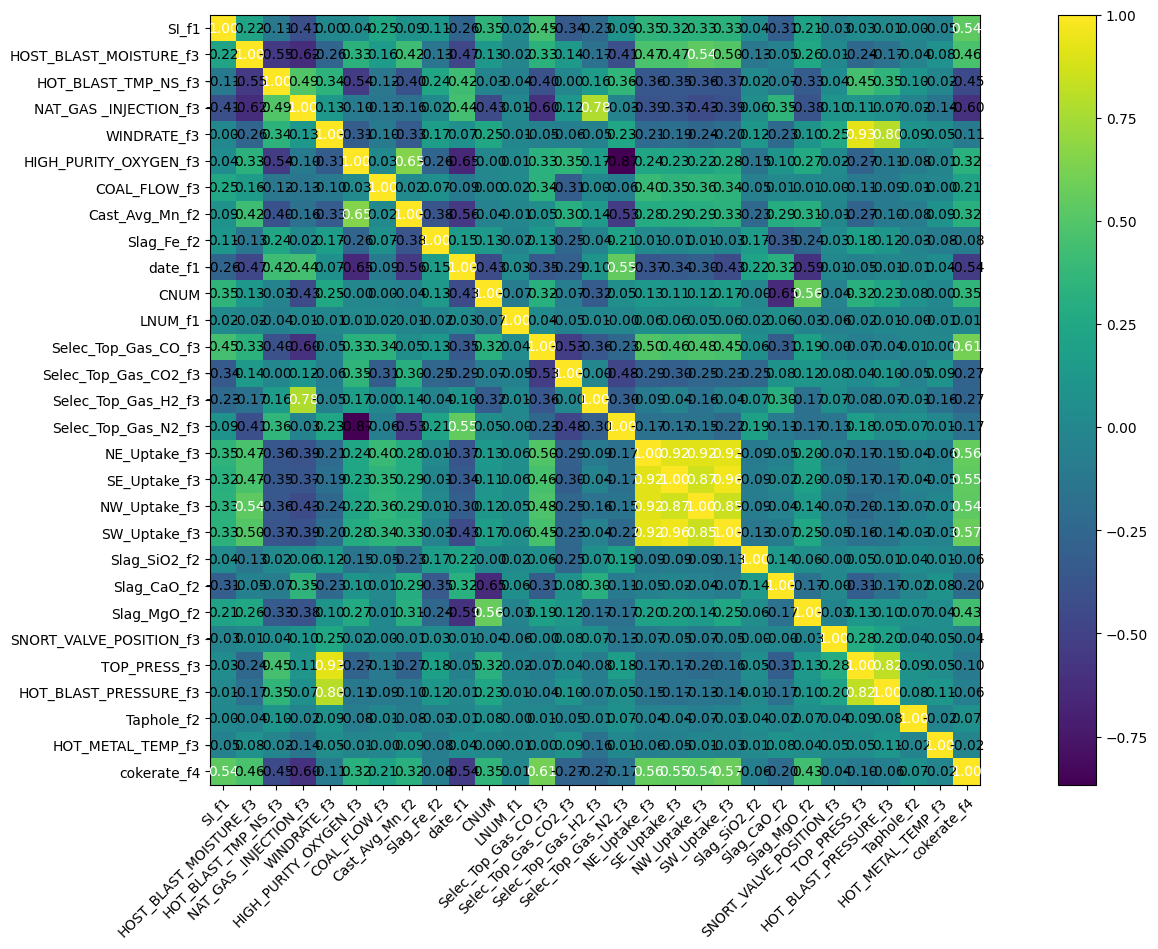

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

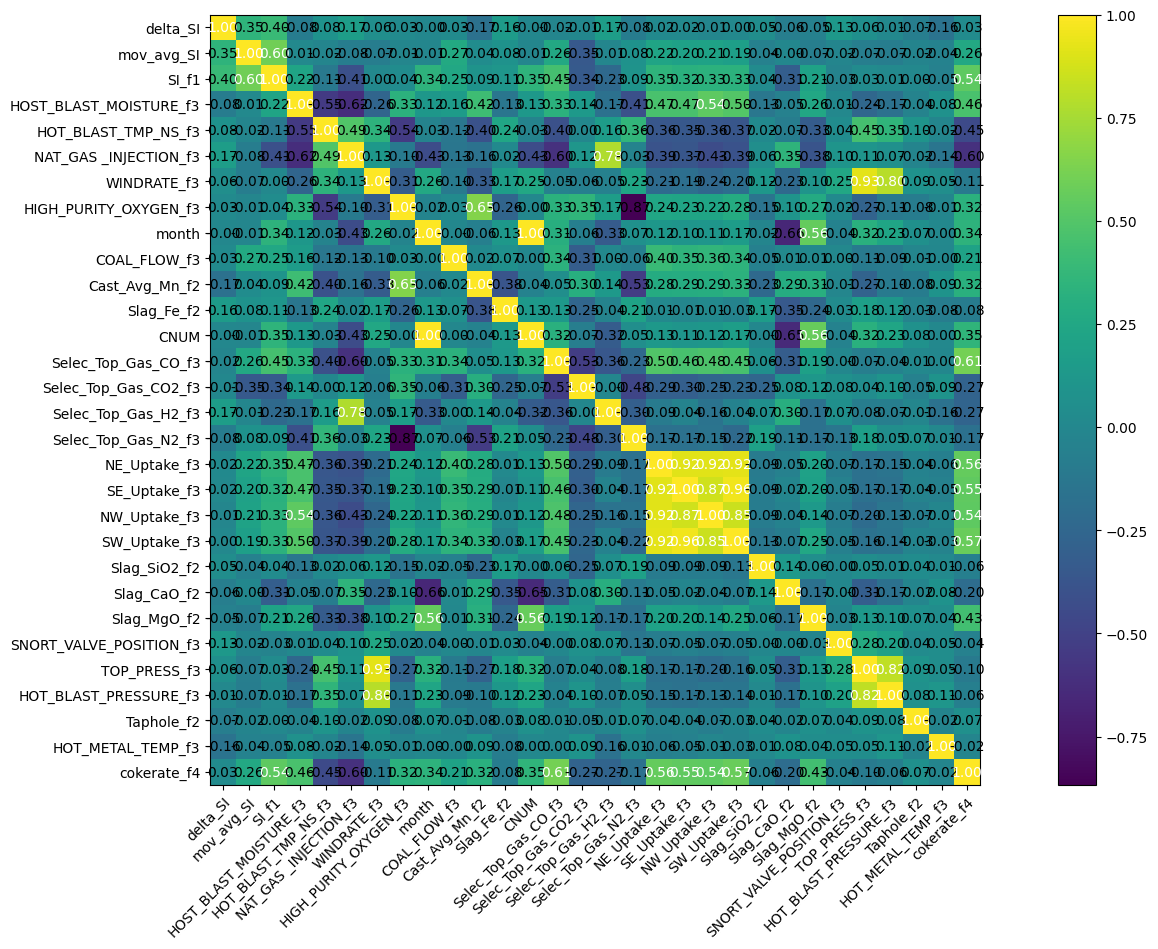

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 9.0
        
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        main_loss       = criterion(idx_pred[:, 8:], yb[:, 8:])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [24]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [25]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.294802
Loss_SI: 1.3571780920028687 Loss_all: 1.2280303239822388
===


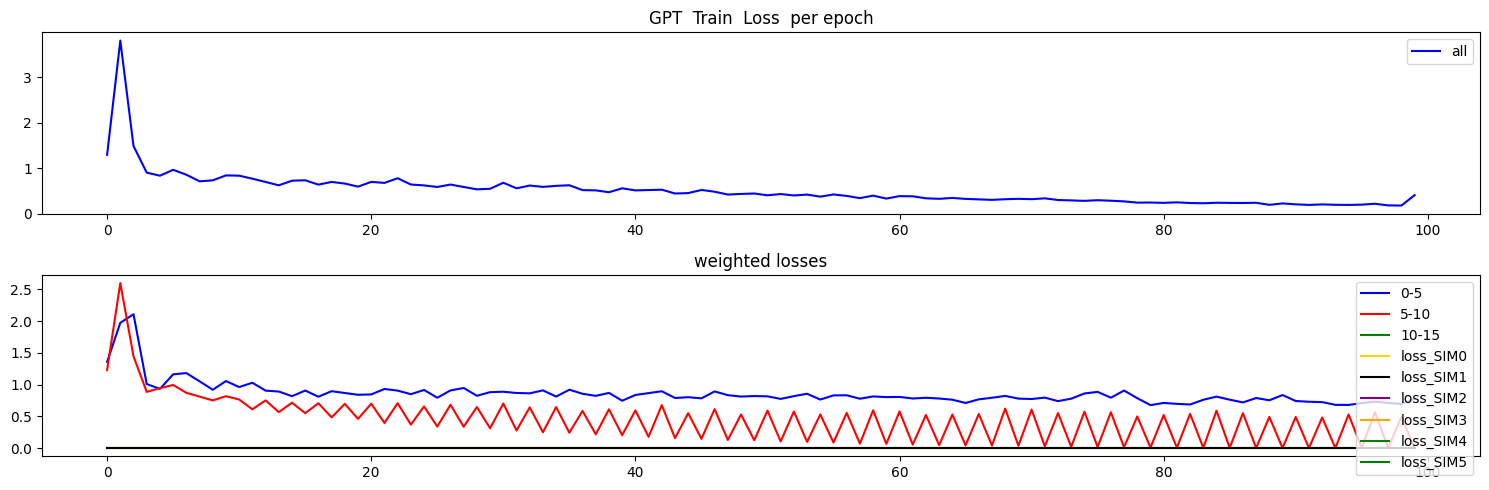

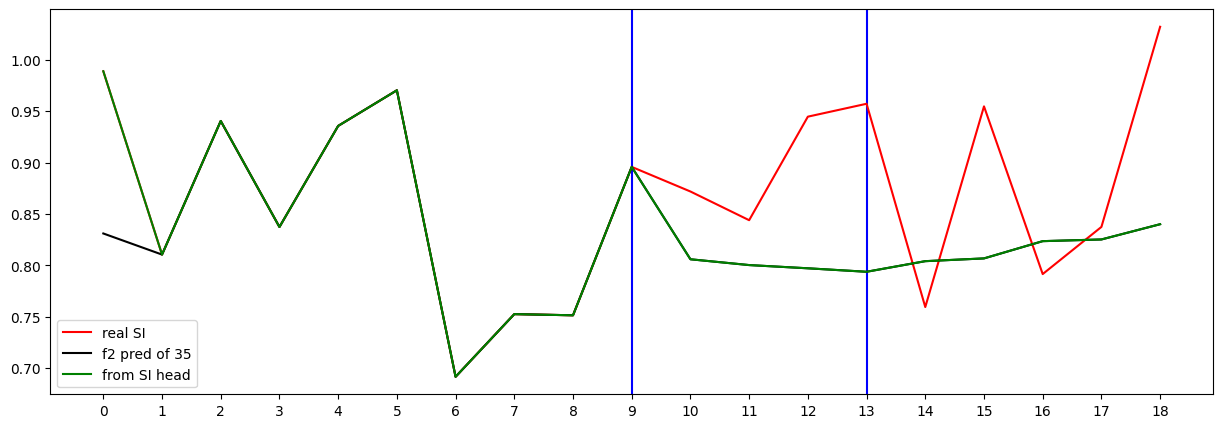

Testing R**2 - (all) - (no inputs):  0.9982716820943915
Testing R**2 - (f2) - SI full (no inputs):  -0.9002443408886938
Testing R**2 - SI head only (no inputs):  -0.9002443408886938
0 ...index R**2 (no inputs):  -0.09767656560594773
1 ...index R**2 (no inputs):  -0.5121290452780896
2 ...index R**2 (no inputs):  -0.9002443408886938
3 ...index R**2 (no inputs):  -67.58624799315427
4 ...index R**2 (no inputs):  -0.5148822435575835
5 ...index R**2 (no inputs):  -9.785600907737937
6 ...index R**2 (no inputs):  -145.94016972120934
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3652889910598851
10 ...index R**2 (no inputs):  -0.015299272090012916
11 ...index R**2 (no inputs):  -437.20733967231536
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4127988934738589
16 ...index R**2 (no inputs):  -0.5616842446206982
17 ...index R**2 (no inputs):  -35.44187

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.377499
Loss_SI: 1.3431113958358765 Loss_all: 1.3313919305801392
===


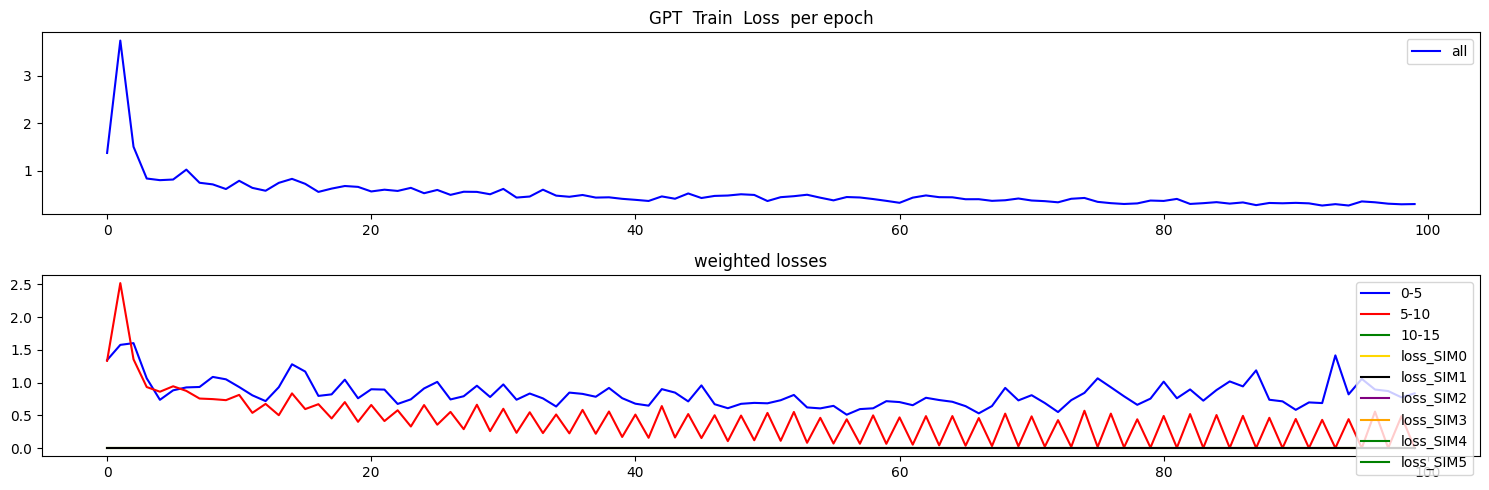

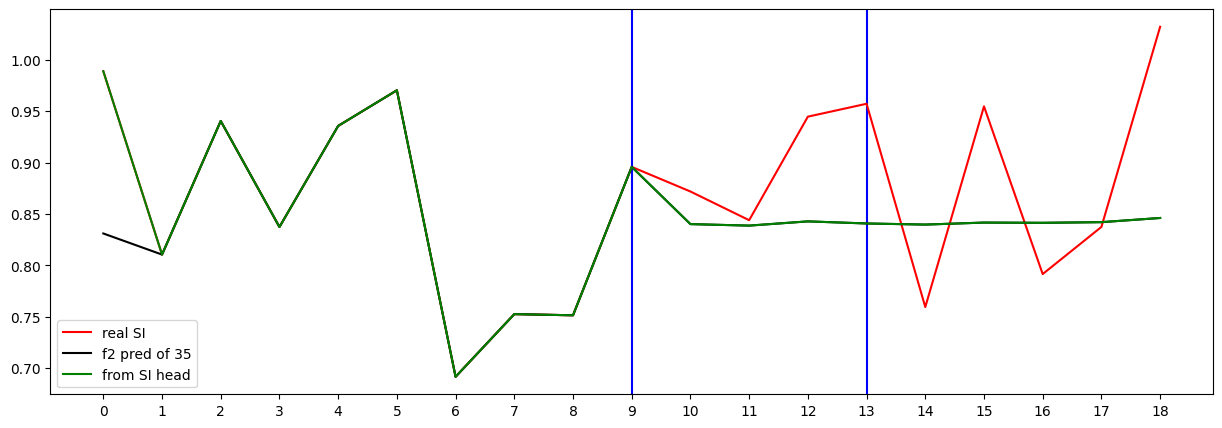

Testing R**2 - (all) - (no inputs):  0.9980348779508376
Testing R**2 - (f2) - SI full (no inputs):  -0.4299970742872563
Testing R**2 - SI head only (no inputs):  -0.4299970742872563
0 ...index R**2 (no inputs):  -0.014862436218991748
1 ...index R**2 (no inputs):  0.11998427823946656
2 ...index R**2 (no inputs):  -0.4299970742872563
3 ...index R**2 (no inputs):  -11.020376851786418
4 ...index R**2 (no inputs):  -0.5038907060281326
5 ...index R**2 (no inputs):  -11.188583365147691
6 ...index R**2 (no inputs):  -473.15849812930645
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.37617637153520533
10 ...index R**2 (no inputs):  0.09616537608097975
11 ...index R**2 (no inputs):  -231.36044789686176
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.11428325530481986
16 ...index R**2 (no inputs):  -0.05510796161601661
17 ...index R**2 (no inputs):  -4.26

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.416648
Loss_SI: 1.1011396646499634 Loss_all: 1.2462974786758423
===


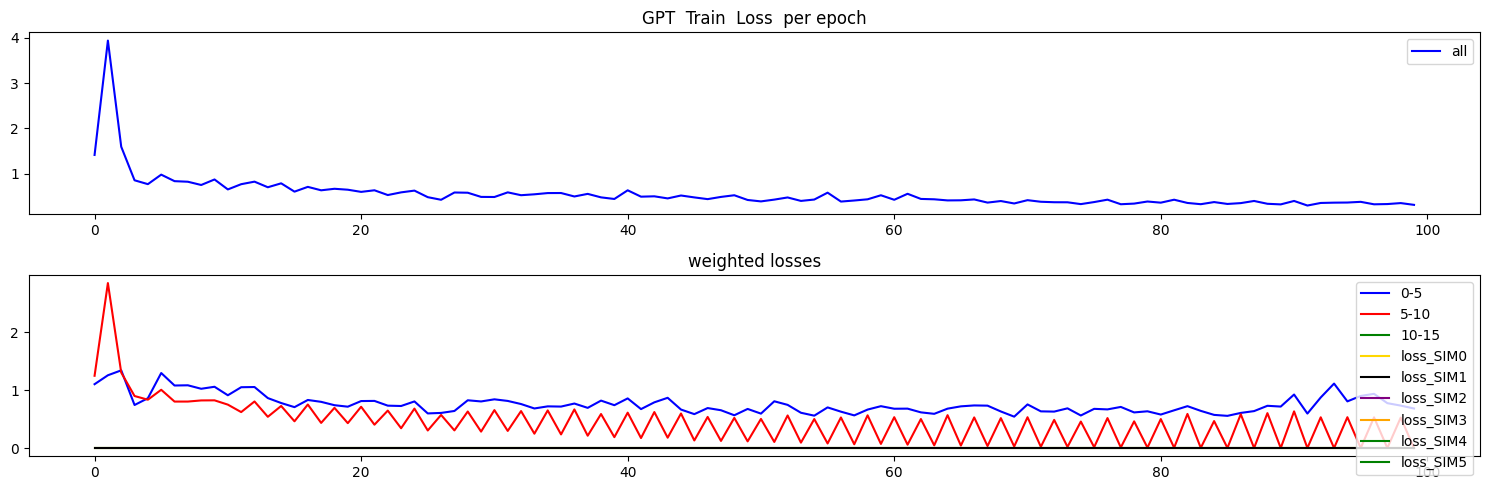

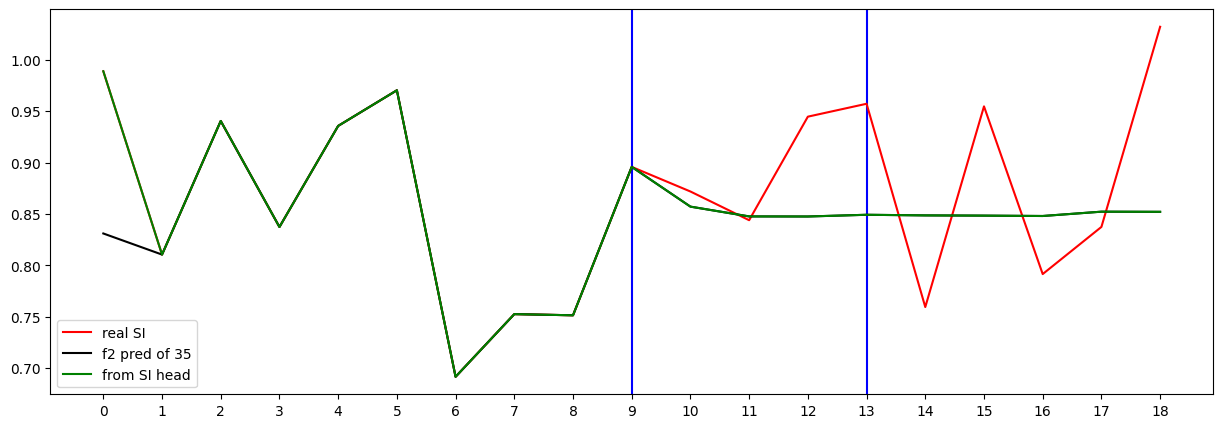

Testing R**2 - (all) - (no inputs):  0.9879614544699542
Testing R**2 - (f2) - SI full (no inputs):  -0.32085873912419083
Testing R**2 - SI head only (no inputs):  -0.32085873912419083
0 ...index R**2 (no inputs):  0.008430217787112948
1 ...index R**2 (no inputs):  0.02600171281837582
2 ...index R**2 (no inputs):  -0.32085873912419083
3 ...index R**2 (no inputs):  -68.92450924333494
4 ...index R**2 (no inputs):  -0.3857393877167099
5 ...index R**2 (no inputs):  -74.97896706974834
6 ...index R**2 (no inputs):  -427.84448280682807
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.16025004164721568
10 ...index R**2 (no inputs):  0.025731646053718027
11 ...index R**2 (no inputs):  -145.17297034830455
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.03152919925224329
16 ...index R**2 (no inputs):  -0.16143923788254
17 ...index R**2 (no inputs):  -13.560

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.525666
Loss_SI: 1.3277488946914673 Loss_all: 1.4562687873840332
===


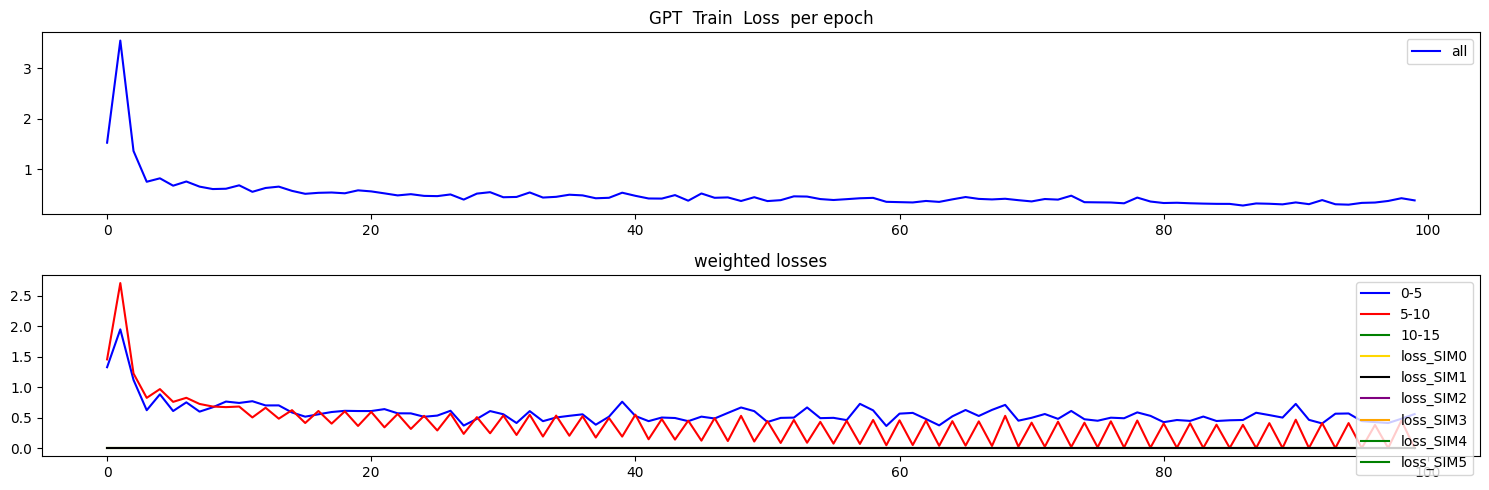

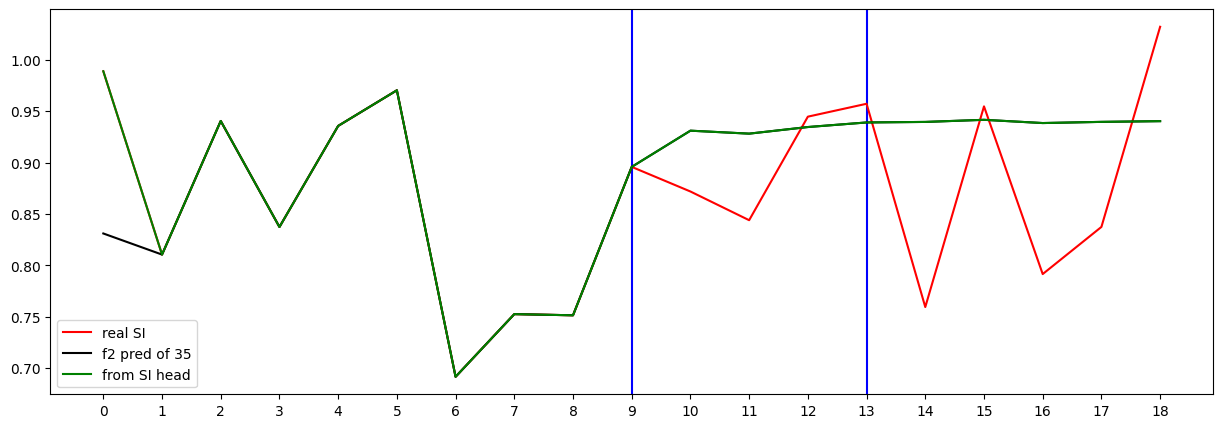

Testing R**2 - (all) - (no inputs):  0.9718628033156127
Testing R**2 - (f2) - SI full (no inputs):  -0.17069761667633498
Testing R**2 - SI head only (no inputs):  -0.17069761667633498
0 ...index R**2 (no inputs):  -0.05189307721132308
1 ...index R**2 (no inputs):  -0.34068710044145734
2 ...index R**2 (no inputs):  -0.17069761667633498
3 ...index R**2 (no inputs):  -34.289218570837626
4 ...index R**2 (no inputs):  -27.067823559325053
5 ...index R**2 (no inputs):  -176.62825323421475
6 ...index R**2 (no inputs):  -498.63306414119086
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.34248421226604053
10 ...index R**2 (no inputs):  0.02543156542309033
11 ...index R**2 (no inputs):  -53.218548691042166
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.002428684696492711
16 ...index R**2 (no inputs):  -0.18325739987112422
17 ...index R**2 (no inputs):  -

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [30]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.274147
Loss_SI: 1.1437416076660156 Loss_all: 1.2218034267425537
===


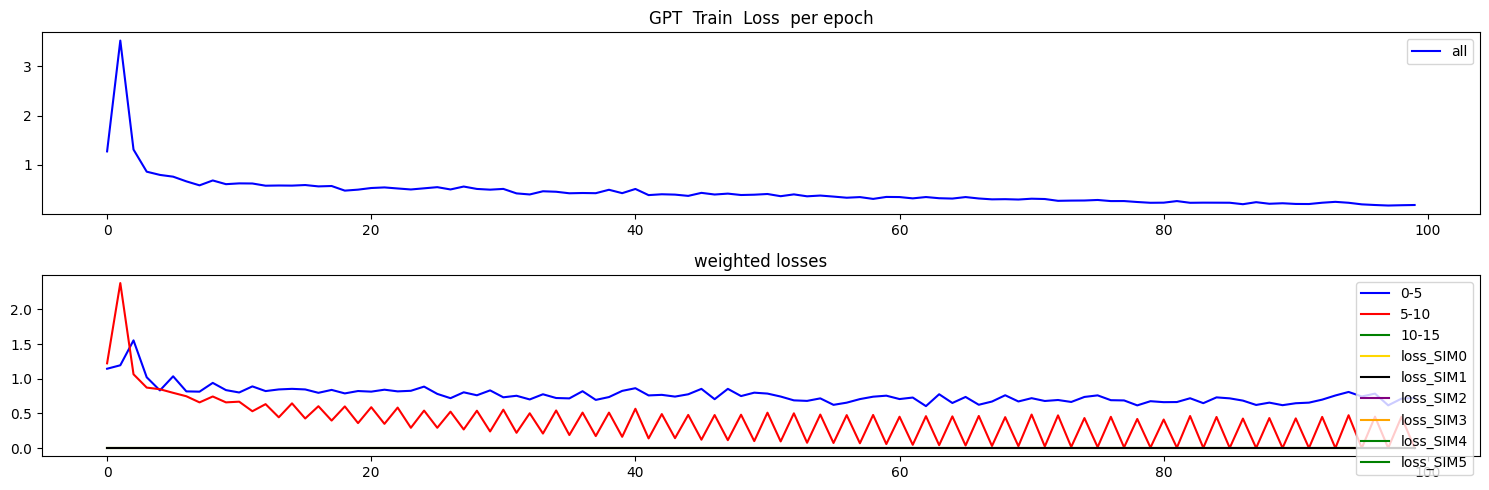

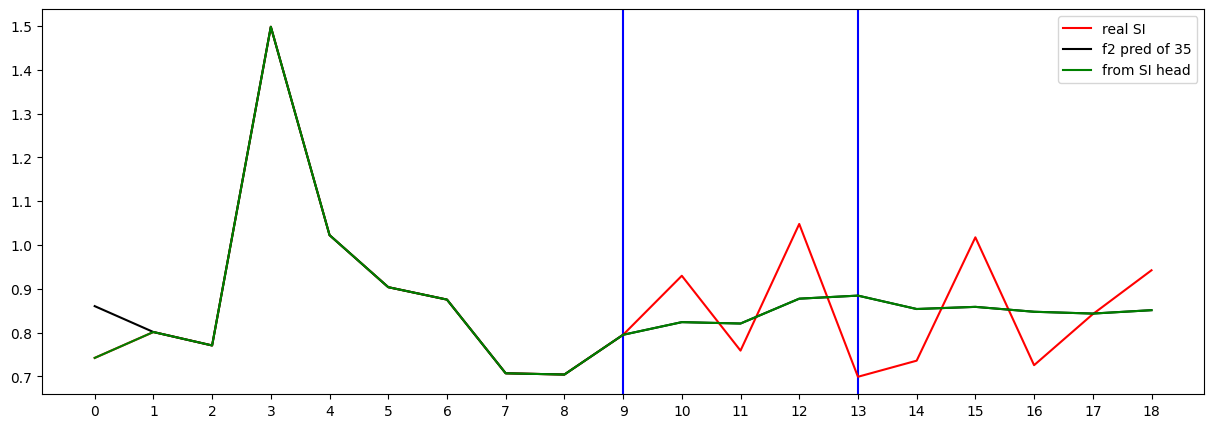

Testing R**2 - (all) - (no inputs):  0.9857974342760358
Testing R**2 - (f2) - SI full (no inputs):  -0.21422523695695705
Testing R**2 - SI head only (no inputs):  -0.21422523695695705
0 ...index R**2 (no inputs):  -0.22273092719278553
1 ...index R**2 (no inputs):  -0.14305682887472382
2 ...index R**2 (no inputs):  -0.21422523695695705
3 ...index R**2 (no inputs):  -68.51749844384047
4 ...index R**2 (no inputs):  0.005428684797453509
5 ...index R**2 (no inputs):  -1.4007678527372338
6 ...index R**2 (no inputs):  -419.6984441625106
7 ...index R**2 (no inputs):  -777.727170386934
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.12380524345441946
10 ...index R**2 (no inputs):  -1.8763290784311306
11 ...index R**2 (no inputs):  -71.44625318715353
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.42954139330165697
16 ...index R**2 (no inputs):  -1.8742833404563468
17 ...index R**2 (no in

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.122072
Loss_SI: 1.1223042011260986 Loss_all: 1.0249992609024048
===


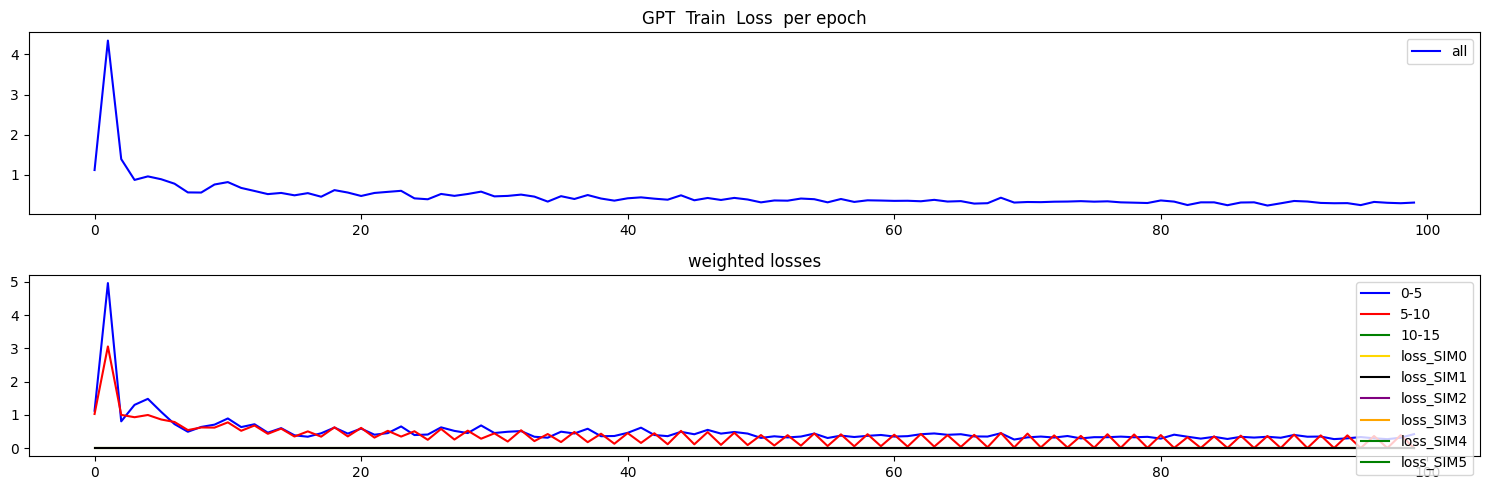

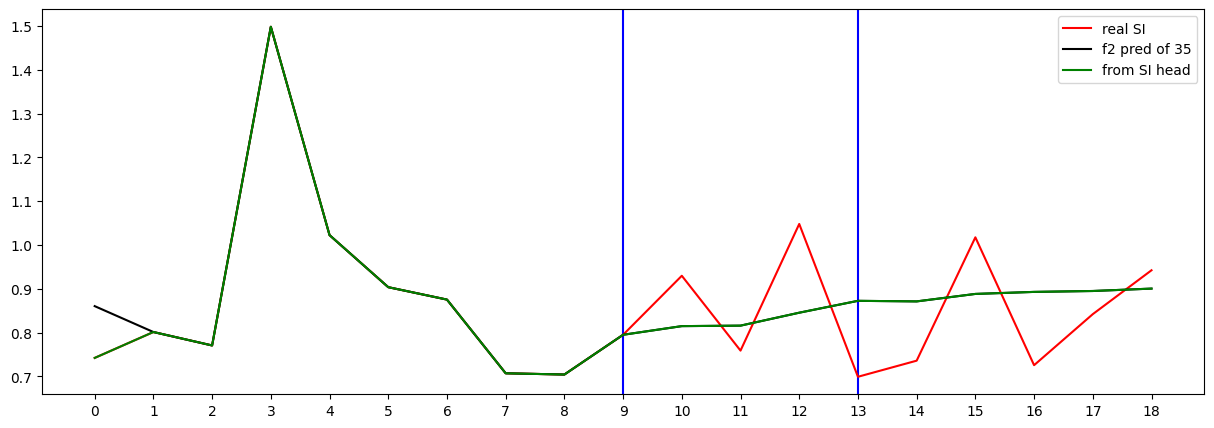

Testing R**2 - (all) - (no inputs):  0.9885561957601179
Testing R**2 - (f2) - SI full (no inputs):  -0.20629259939469846
Testing R**2 - SI head only (no inputs):  -0.20629259939469846
0 ...index R**2 (no inputs):  0.011798426021881525
1 ...index R**2 (no inputs):  -0.029935429840632688
2 ...index R**2 (no inputs):  -0.20629259939469846
3 ...index R**2 (no inputs):  -27.595606179880896
4 ...index R**2 (no inputs):  -95.38820804439442
5 ...index R**2 (no inputs):  -0.9324416859161808
6 ...index R**2 (no inputs):  -107.67171838674815
7 ...index R**2 (no inputs):  -437.5623857538633
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.025314104812345528
10 ...index R**2 (no inputs):  -0.3992013934328469
11 ...index R**2 (no inputs):  -80.50661309081384
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.932733622550622
16 ...index R**2 (no inputs):  -0.4513675545055993
17 ...index R**2 (no 

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.559462
Loss_SI: 1.6258915662765503 Loss_all: 1.4622915983200073
===


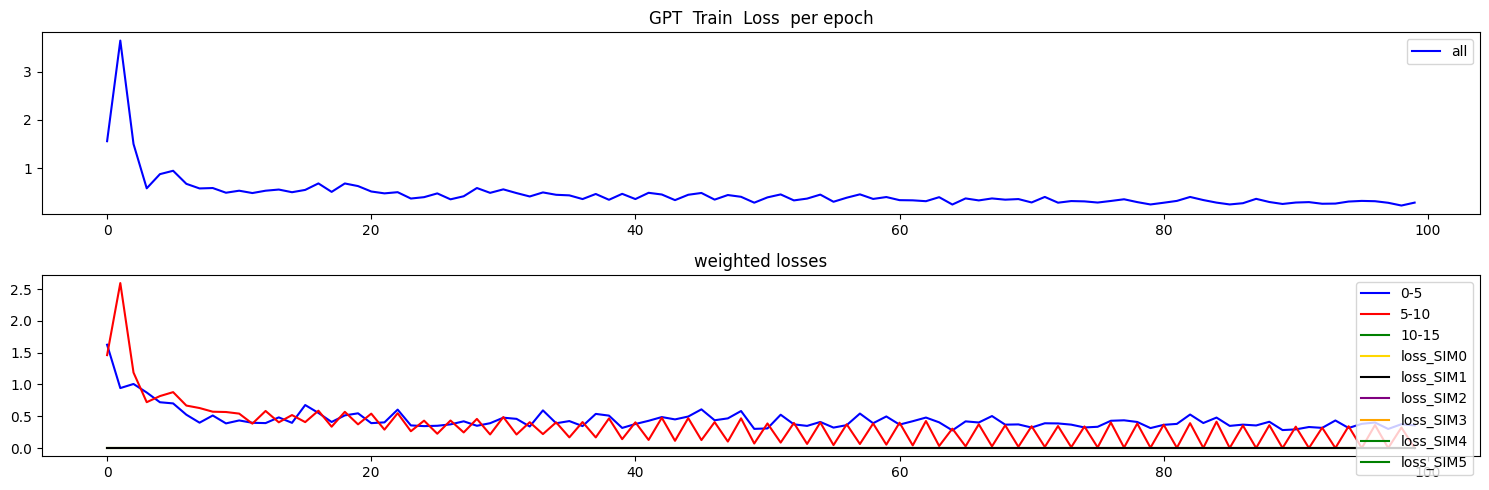

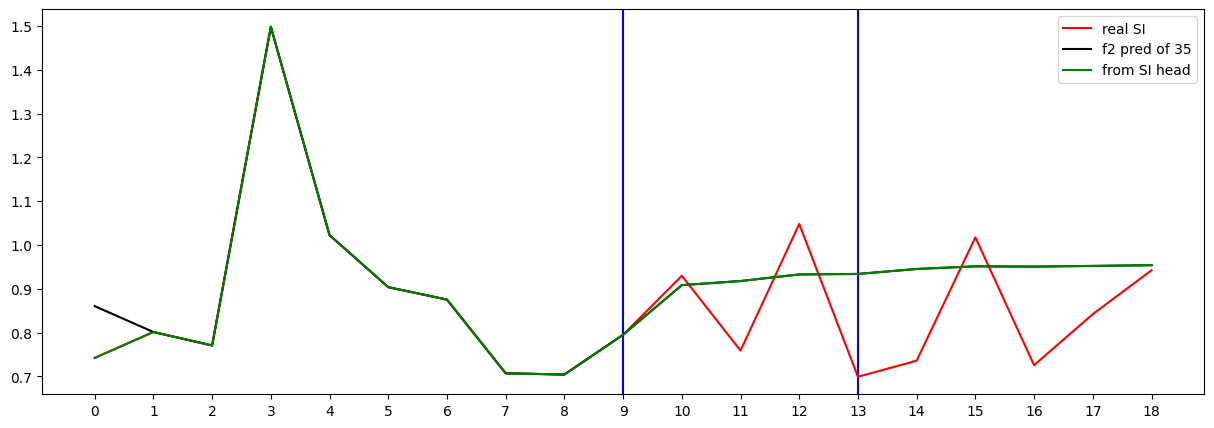

Testing R**2 - (all) - (no inputs):  0.9828892489098362
Testing R**2 - (f2) - SI full (no inputs):  -0.6970487685749533
Testing R**2 - SI head only (no inputs):  -0.6970487685749533
0 ...index R**2 (no inputs):  -0.015560181444618681
1 ...index R**2 (no inputs):  0.028153176628022636
2 ...index R**2 (no inputs):  -0.6970487685749533
3 ...index R**2 (no inputs):  -70.30029251267317
4 ...index R**2 (no inputs):  -64.15770058956561
5 ...index R**2 (no inputs):  -1.8590495822309503
6 ...index R**2 (no inputs):  -36.83792460260159
7 ...index R**2 (no inputs):  -3586.755030337149
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.06117196530840152
10 ...index R**2 (no inputs):  -0.24429620286987652
11 ...index R**2 (no inputs):  -22.4267417865569
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.46308940536518817
16 ...index R**2 (no inputs):  -1.611708561764206
17 ...index R**2 (no inputs

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.165279
Loss_SI: 1.0820331573486328 Loss_all: 1.2667090892791748
===


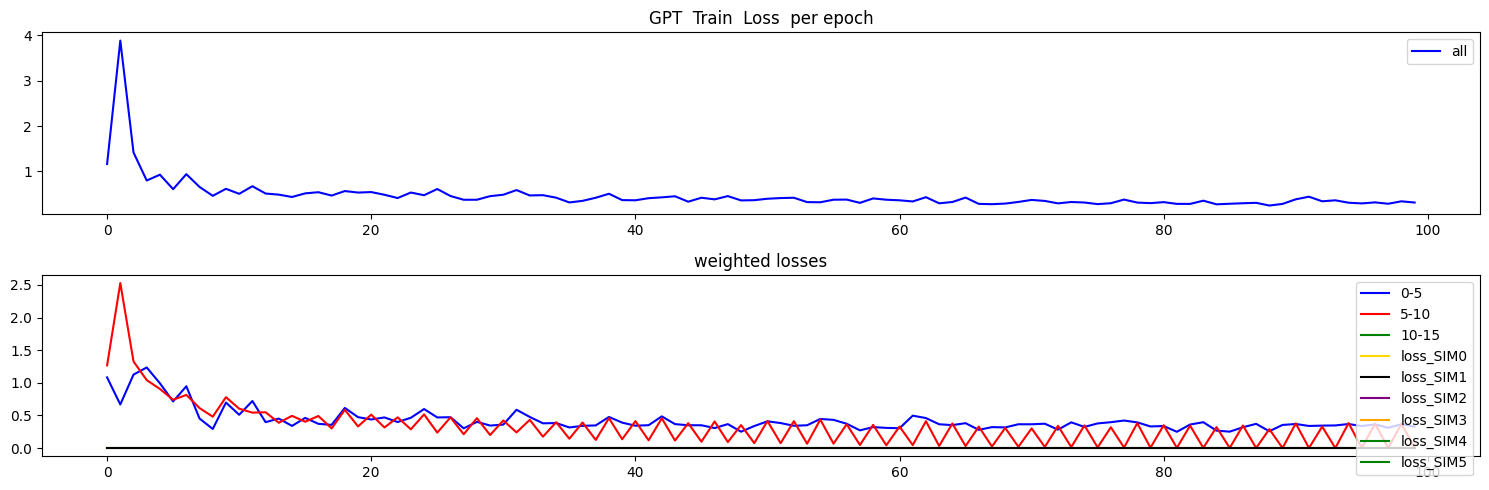

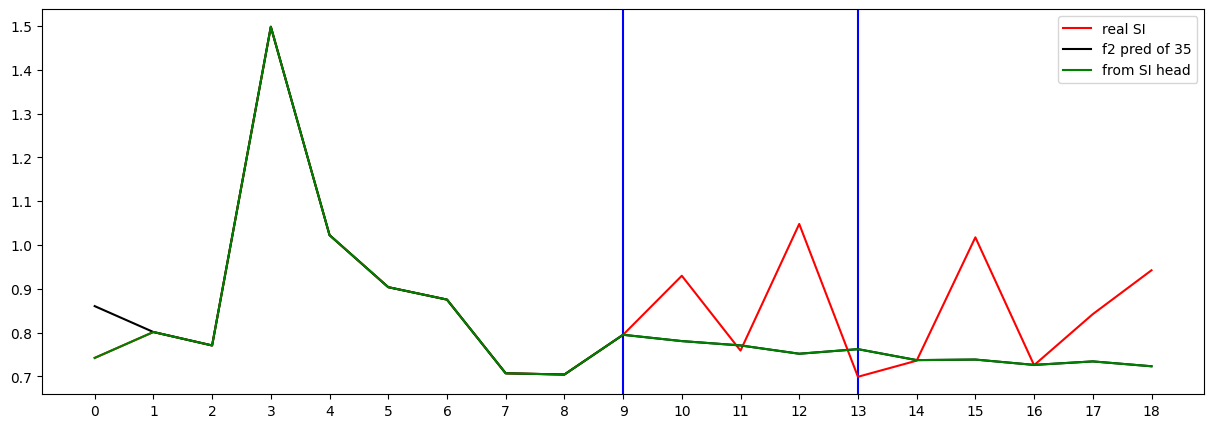

Testing R**2 - (all) - (no inputs):  0.9885126999570396
Testing R**2 - (f2) - SI full (no inputs):  -0.4952913074363865
Testing R**2 - SI head only (no inputs):  -0.4952913074363865
0 ...index R**2 (no inputs):  -0.03735449852843886
1 ...index R**2 (no inputs):  -0.004169608833777927
2 ...index R**2 (no inputs):  -0.4952913074363865
3 ...index R**2 (no inputs):  -6.497679909021747
4 ...index R**2 (no inputs):  -715.9352863491143
5 ...index R**2 (no inputs):  -0.9214181631809393
6 ...index R**2 (no inputs):  -81.42372796103811
7 ...index R**2 (no inputs):  -5790.369503216101
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.0020109111153896464
10 ...index R**2 (no inputs):  -0.777456769049752
11 ...index R**2 (no inputs):  -378.670342477632
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.26425018372701525
16 ...index R**2 (no inputs):  -0.7337585470693813
17 ...index R**2 (no input

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [35]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.988409
Loss_SI: 1.2829880714416504 Loss_all: 1.079666256904602
===


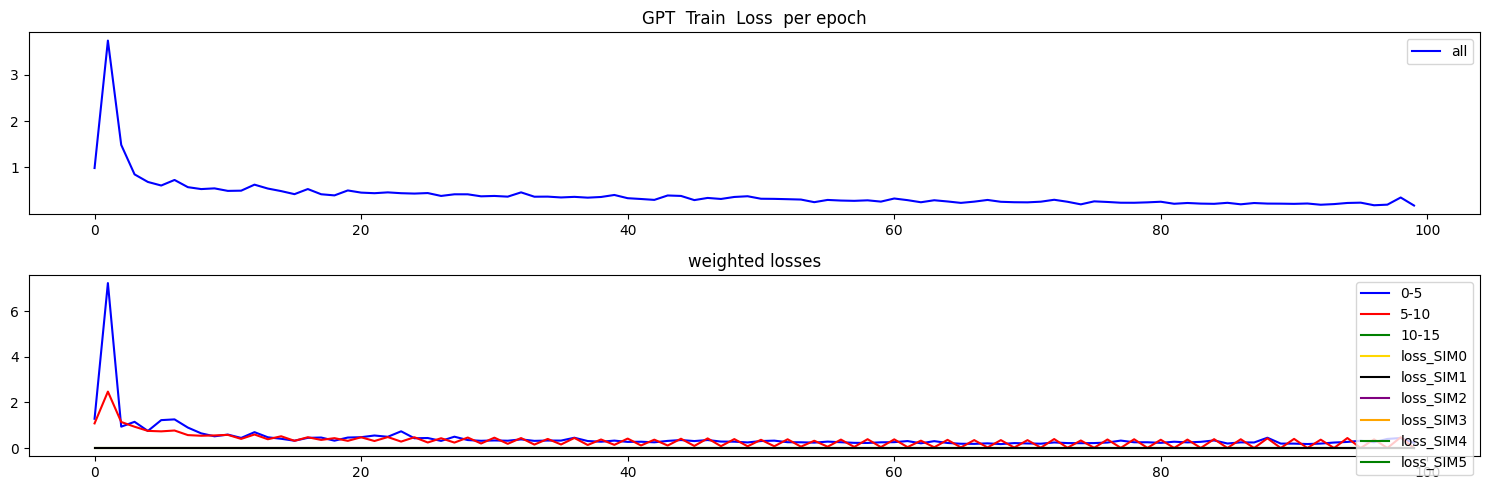

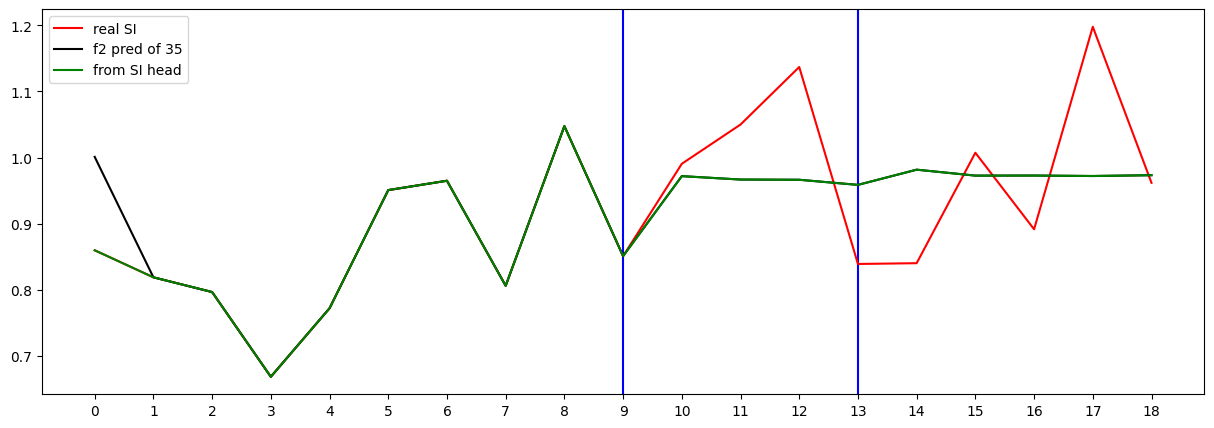

Testing R**2 - (all) - (no inputs):  0.9802901602444639
Testing R**2 - (f2) - SI full (no inputs):  0.02437044589239512
Testing R**2 - SI head only (no inputs):  0.02437044589239512
0 ...index R**2 (no inputs):  -0.14030105208959798
1 ...index R**2 (no inputs):  -1.6589563841635626
2 ...index R**2 (no inputs):  0.02437044589239512
3 ...index R**2 (no inputs):  -11.893774177128861
4 ...index R**2 (no inputs):  -109.669887553193
5 ...index R**2 (no inputs):  -100.07235806703014
6 ...index R**2 (no inputs):  -14.034725577323705
7 ...index R**2 (no inputs):  -658.4919681532482
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.019332506116934045
10 ...index R**2 (no inputs):  -0.05528277702758144
11 ...index R**2 (no inputs):  -0.009208340985088936
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.15996029370429943
16 ...index R**2 (no inputs):  -0.14500615210105372
17 ...index R**2 (no

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.226976
Loss_SI: 1.408434271812439 Loss_all: 1.3367456197738647
===


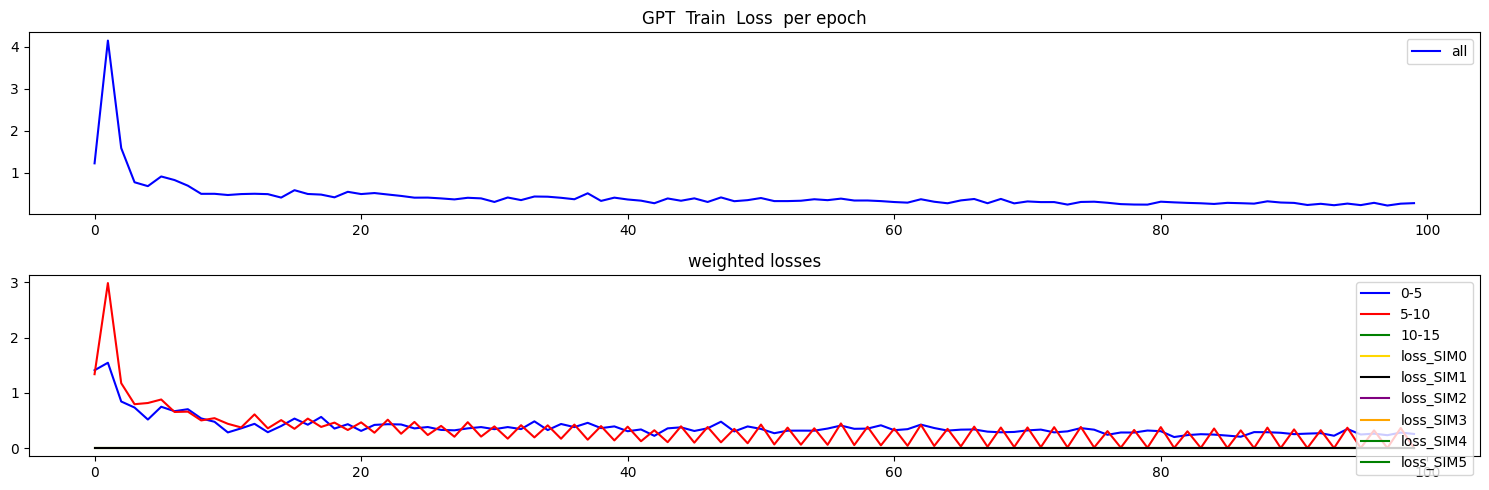

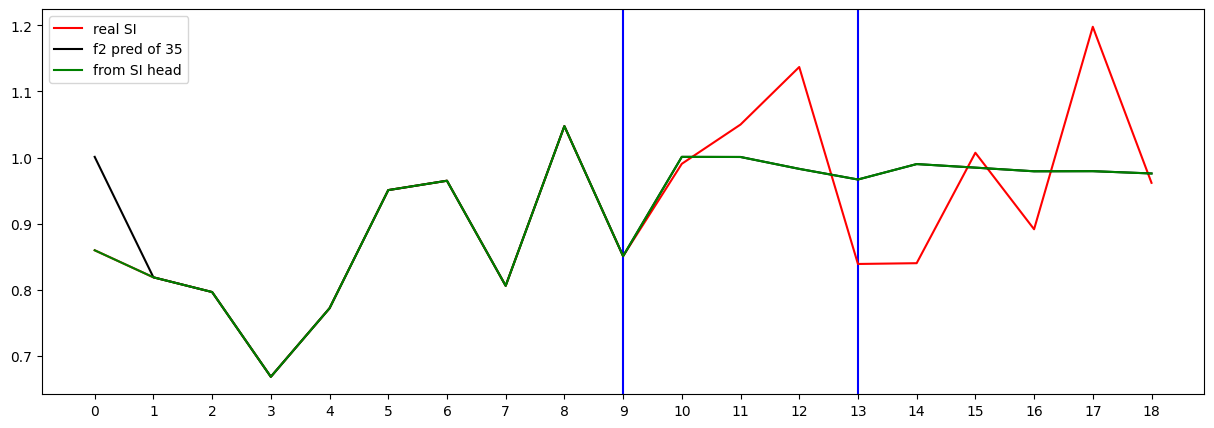

Testing R**2 - (all) - (no inputs):  0.9862777285391223
Testing R**2 - (f2) - SI full (no inputs):  0.08165619633183041
Testing R**2 - SI head only (no inputs):  0.08165619633183041
0 ...index R**2 (no inputs):  0.012182735678740841
1 ...index R**2 (no inputs):  -2.0818355216930686
2 ...index R**2 (no inputs):  0.08165619633183041
3 ...index R**2 (no inputs):  -377.73583821002217
4 ...index R**2 (no inputs):  -47.23469302473545
5 ...index R**2 (no inputs):  -69.15711094977235
6 ...index R**2 (no inputs):  -16.1379515969589
7 ...index R**2 (no inputs):  -2824.1085302033634
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.06279457317742754
10 ...index R**2 (no inputs):  0.029168717480222428
11 ...index R**2 (no inputs):  -7.7010036644521005
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.10059805162835844
16 ...index R**2 (no inputs):  -0.9059341790236575
17 ...index R**2 (no input

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.473640
Loss_SI: 1.5784682035446167 Loss_all: 1.4660471677780151
===


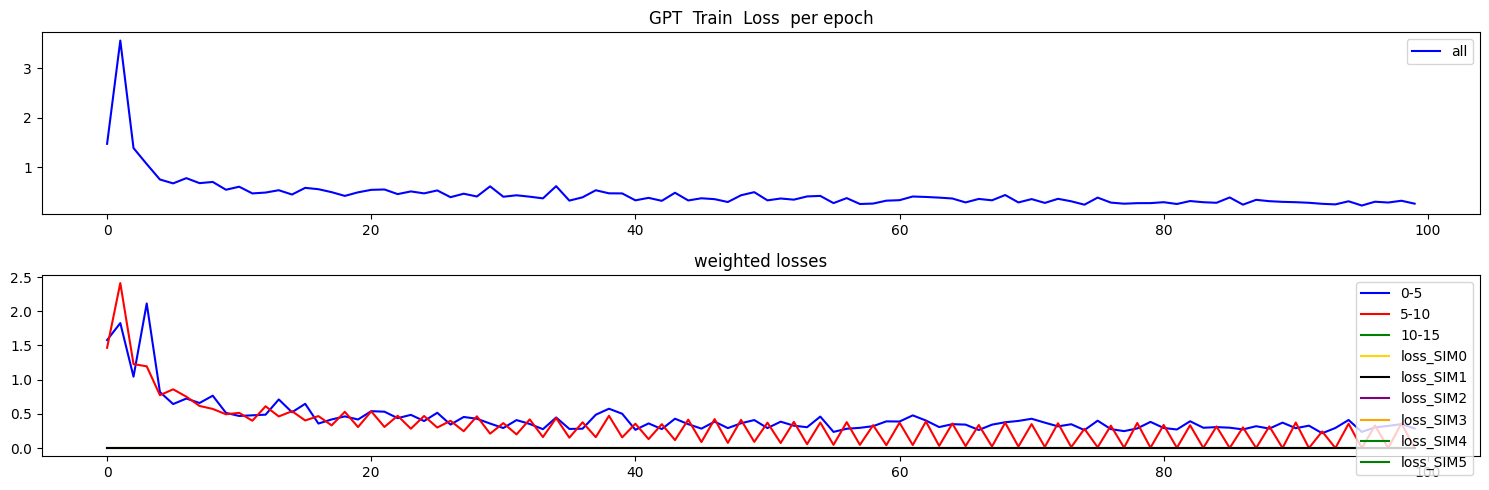

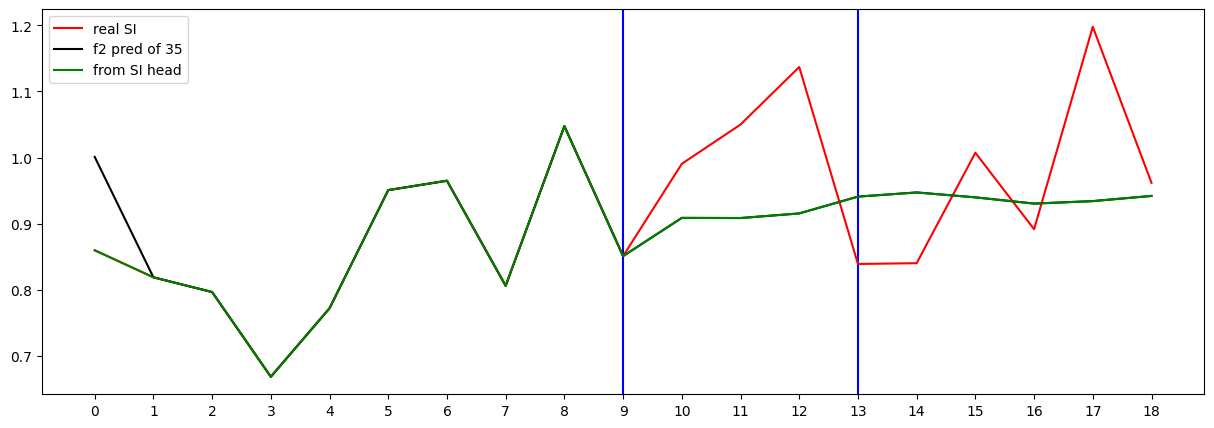

Testing R**2 - (all) - (no inputs):  0.9878757846307772
Testing R**2 - (f2) - SI full (no inputs):  -0.24003033475447322
Testing R**2 - SI head only (no inputs):  -0.24003033475447322
0 ...index R**2 (no inputs):  -0.09309720396071852
1 ...index R**2 (no inputs):  -1.4177299665544534
2 ...index R**2 (no inputs):  -0.24003033475447322
3 ...index R**2 (no inputs):  -429.45186699048
4 ...index R**2 (no inputs):  -11.65232812785973
5 ...index R**2 (no inputs):  -59.38735747843665
6 ...index R**2 (no inputs):  -46.038300599118216
7 ...index R**2 (no inputs):  -686.7019238897501
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.04868953786078323
10 ...index R**2 (no inputs):  -0.017987007989068493
11 ...index R**2 (no inputs):  -2.291997513631779
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.2102743384553285
16 ...index R**2 (no inputs):  -0.42697249973540896
17 ...index R**2 (no inp

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.182407
Loss_SI: 1.204907774925232 Loss_all: 1.238783836364746
===


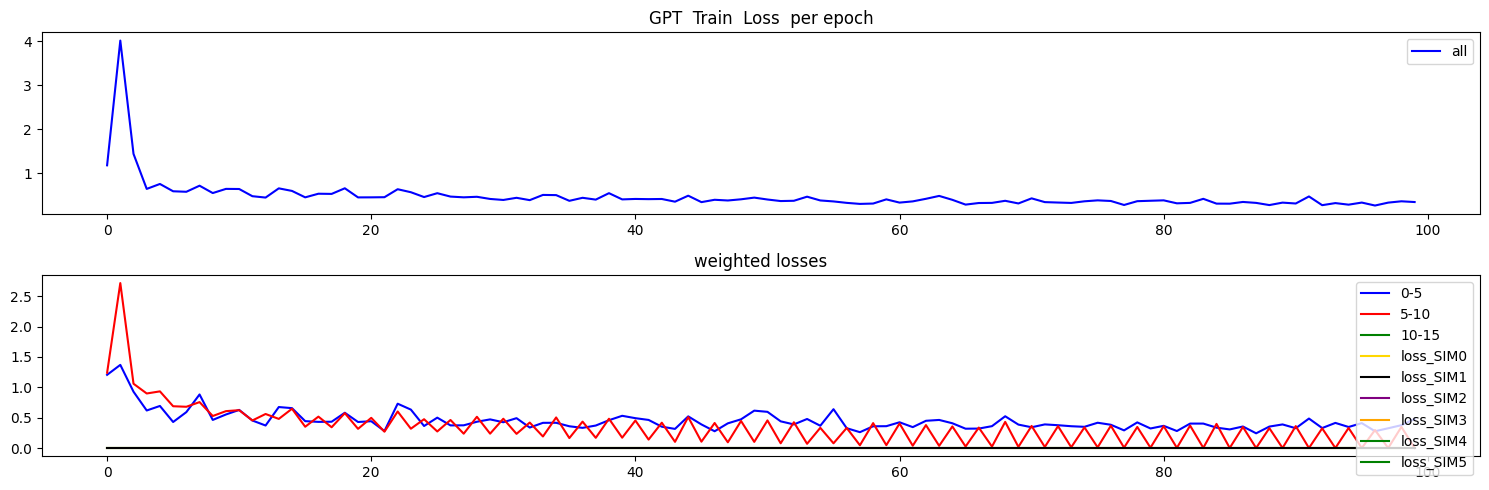

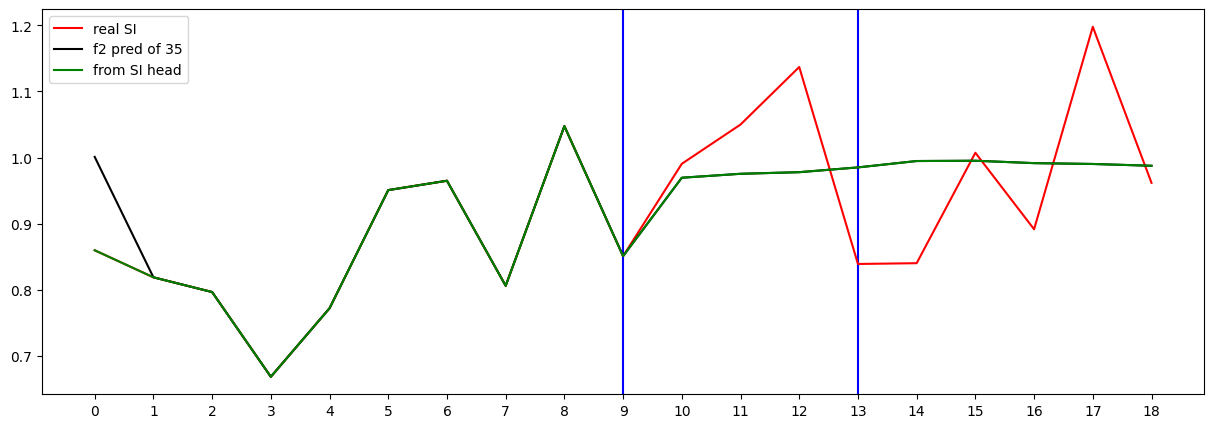

Testing R**2 - (all) - (no inputs):  0.990852888870652
Testing R**2 - (f2) - SI full (no inputs):  -0.02738003464149652
Testing R**2 - SI head only (no inputs):  -0.02738003464149652
0 ...index R**2 (no inputs):  0.02000248390649262
1 ...index R**2 (no inputs):  -0.5426834865262029
2 ...index R**2 (no inputs):  -0.02738003464149652
3 ...index R**2 (no inputs):  -237.80371335195767
4 ...index R**2 (no inputs):  -10.693859961114978
5 ...index R**2 (no inputs):  -34.37169562536239
6 ...index R**2 (no inputs):  -19.31716205303135
7 ...index R**2 (no inputs):  -1546.4418191406778
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.026275439066529405
10 ...index R**2 (no inputs):  -0.03909975543187927
11 ...index R**2 (no inputs):  -2.0015052500783654
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.3679535420770965
16 ...index R**2 (no inputs):  -0.4696724320715364
17 ...index R**2 (no i

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [40]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.129786
Loss_SI: 1.5092556476593018 Loss_all: 1.2109951972961426
===


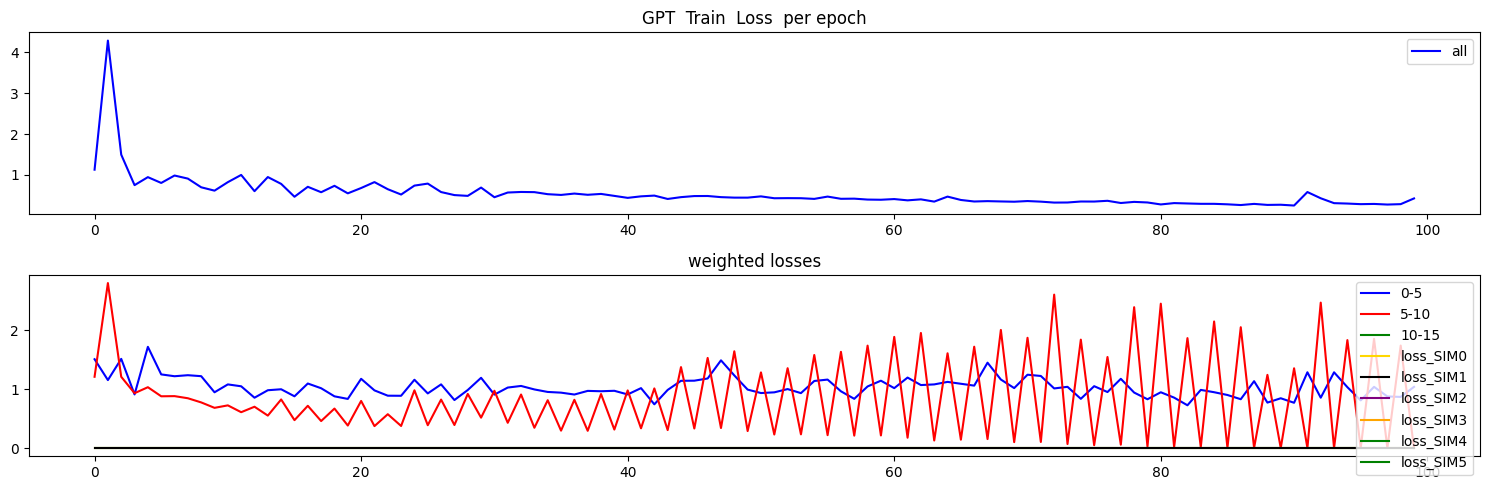

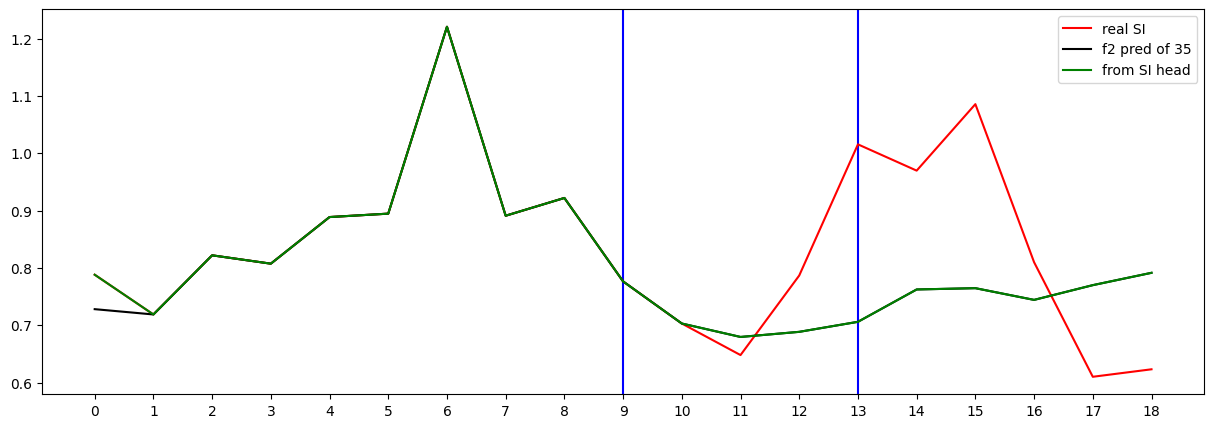

Testing R**2 - (all) - (no inputs):  0.9727990627188141
Testing R**2 - (f2) - SI full (no inputs):  -0.3724438713074132
Testing R**2 - SI head only (no inputs):  -0.3724438713074132
0 ...index R**2 (no inputs):  -0.26783564184958464
1 ...index R**2 (no inputs):  -0.4125054773569097
2 ...index R**2 (no inputs):  -0.3724438713074132
3 ...index R**2 (no inputs):  -1.4898973442730976
4 ...index R**2 (no inputs):  -1.120361776172032
5 ...index R**2 (no inputs):  -0.08529176448102116
6 ...index R**2 (no inputs):  -1.3322046157457579
7 ...index R**2 (no inputs):  -0.27924921412109516
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.5250004626071503
10 ...index R**2 (no inputs):  -0.8402031847340807
11 ...index R**2 (no inputs):  -37.15829302358315
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.6292406296155737
16 ...index R**2 (no inputs):  -5.100456738684177
17 ...index R**2 (no input

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.312764
Loss_SI: 1.2607167959213257 Loss_all: 1.263490915298462
===


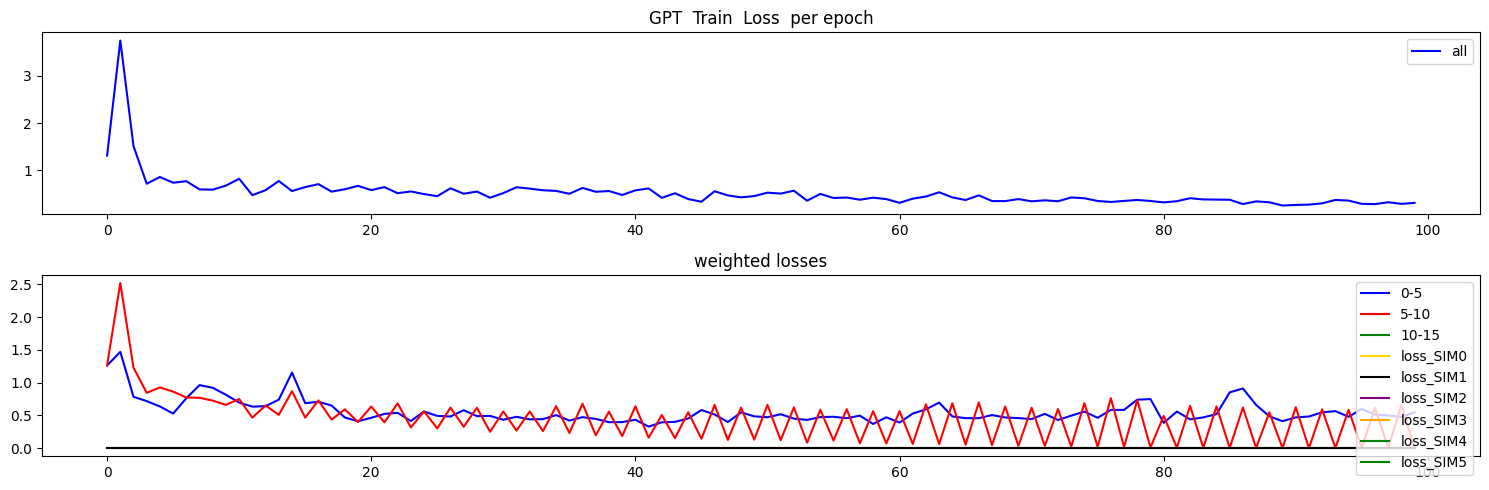

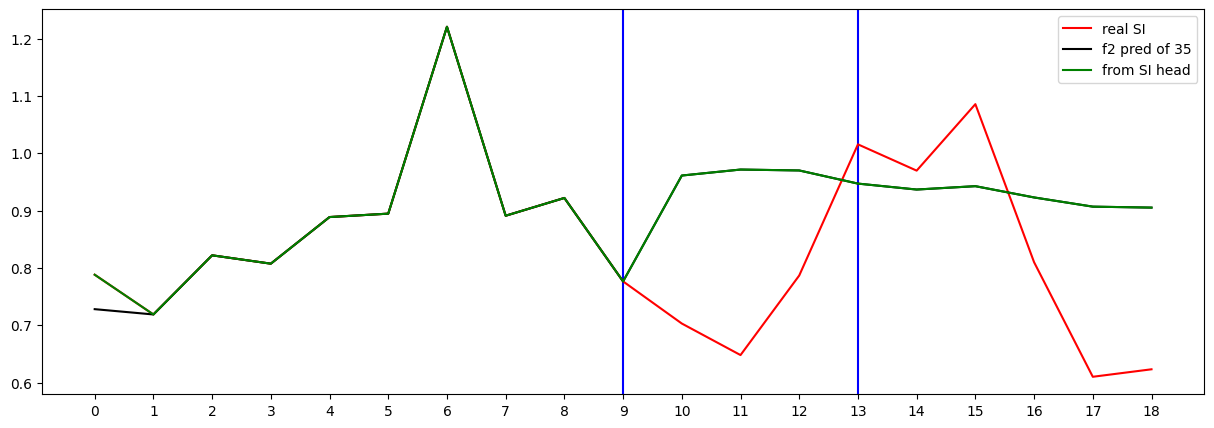

Testing R**2 - (all) - (no inputs):  0.9735691048897681
Testing R**2 - (f2) - SI full (no inputs):  -0.4926637395627316
Testing R**2 - SI head only (no inputs):  -0.4926637395627316
0 ...index R**2 (no inputs):  -0.06649688199158077
1 ...index R**2 (no inputs):  -3.342142159912549
2 ...index R**2 (no inputs):  -0.4926637395627316
3 ...index R**2 (no inputs):  -2.243633516333941
4 ...index R**2 (no inputs):  -0.9873688913593426
5 ...index R**2 (no inputs):  -0.0551742921448386
6 ...index R**2 (no inputs):  -1.4666849806400273
7 ...index R**2 (no inputs):  -0.2792483927911529
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.019468218714959518
10 ...index R**2 (no inputs):  0.03130465793569981
11 ...index R**2 (no inputs):  -3.8970930295659114
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.00026921595504392215
16 ...index R**2 (no inputs):  -0.10522396027860137
17 ...index R**2 (n

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.285048
Loss_SI: 1.0298751592636108 Loss_all: 1.1417579650878906
===


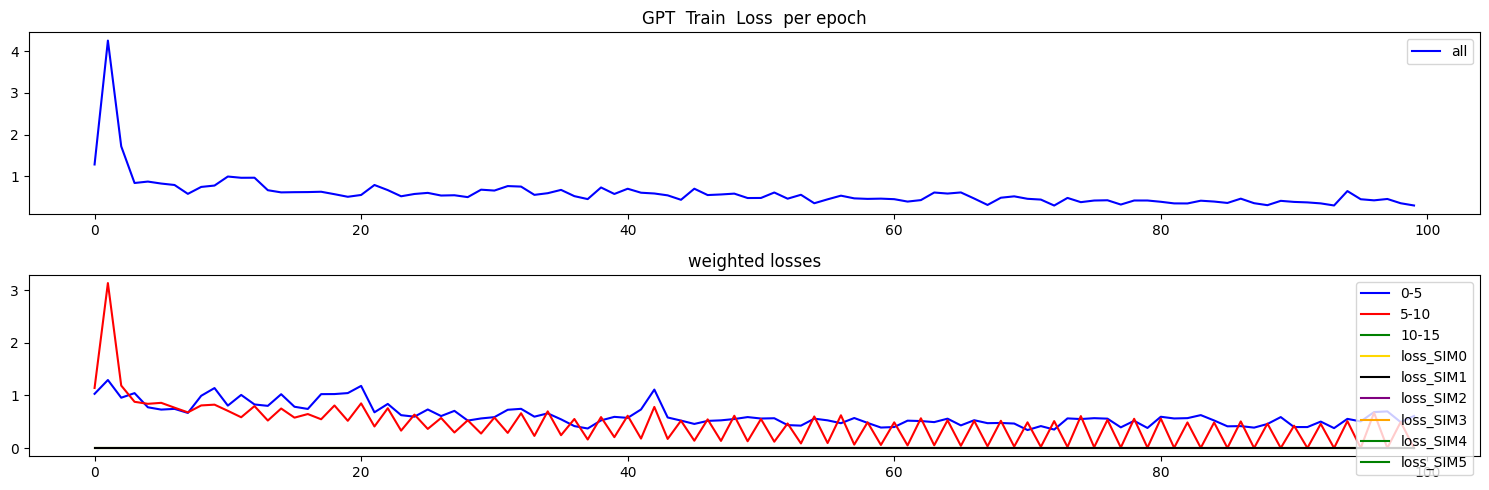

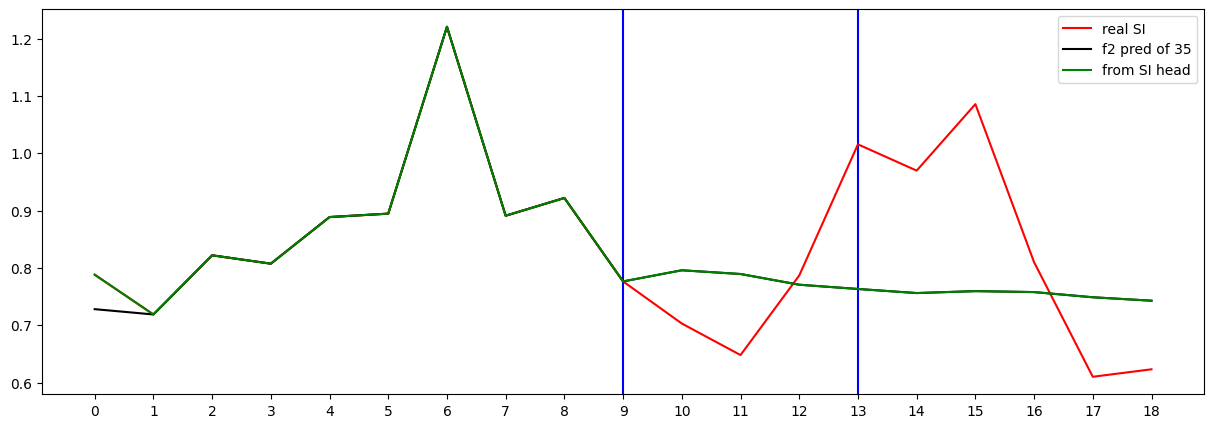

Testing R**2 - (all) - (no inputs):  0.974856680106361
Testing R**2 - (f2) - SI full (no inputs):  -0.12058849447462383
Testing R**2 - SI head only (no inputs):  -0.12058849447462383
0 ...index R**2 (no inputs):  -0.03877040816363819
1 ...index R**2 (no inputs):  -0.13236794175629374
2 ...index R**2 (no inputs):  -0.12058849447462383
3 ...index R**2 (no inputs):  -4.249473758926461
4 ...index R**2 (no inputs):  -1.0756871459062451
5 ...index R**2 (no inputs):  -0.002839356082307898
6 ...index R**2 (no inputs):  -1.226884924129433
7 ...index R**2 (no inputs):  -0.2792520374478391
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.051617631719154566
10 ...index R**2 (no inputs):  0.01144811392498235
11 ...index R**2 (no inputs):  -54.00445859058522
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.17016836667207635
16 ...index R**2 (no inputs):  -0.5884794274114753
17 ...index R**2 (n

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.416829
Loss_SI: 1.541915774345398 Loss_all: 1.375854730606079
===


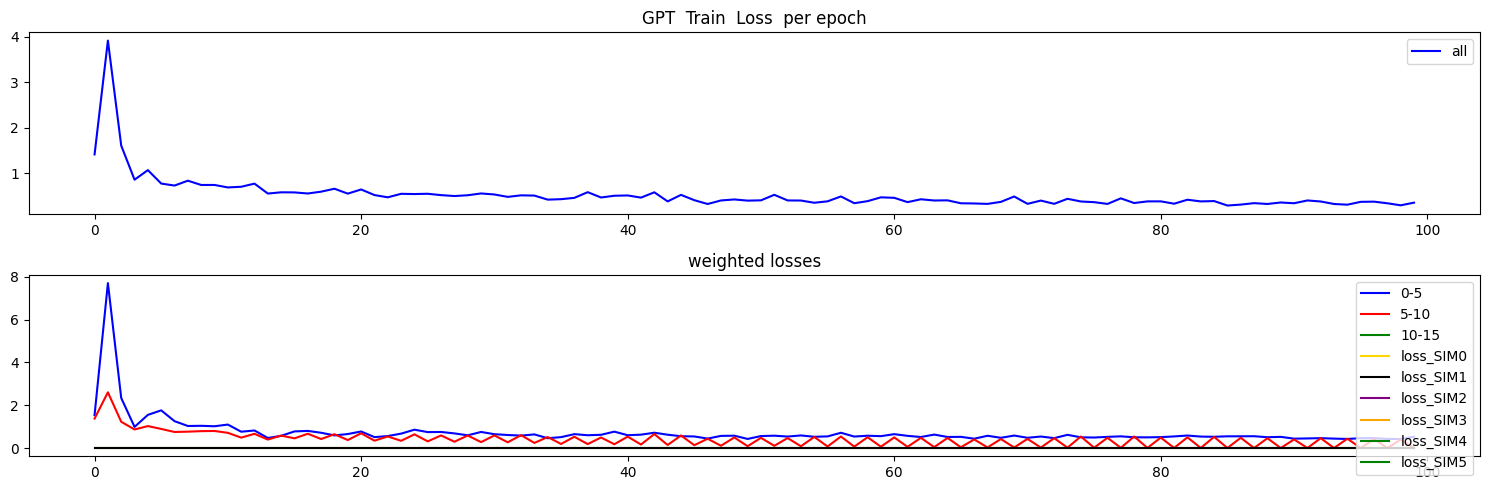

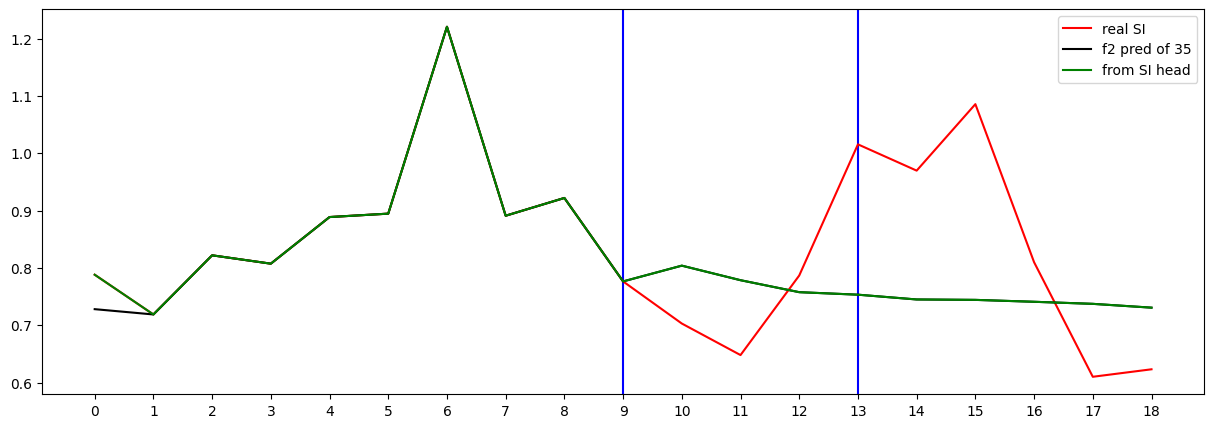

Testing R**2 - (all) - (no inputs):  0.9751115060905979
Testing R**2 - (f2) - SI full (no inputs):  -0.18699370306269825
Testing R**2 - SI head only (no inputs):  -0.18699370306269825
0 ...index R**2 (no inputs):  -0.07089884756062403
1 ...index R**2 (no inputs):  0.05200601531494675
2 ...index R**2 (no inputs):  -0.18699370306269825
3 ...index R**2 (no inputs):  -14.503078778868339
4 ...index R**2 (no inputs):  -0.5612485263227791
5 ...index R**2 (no inputs):  0.006242034906729366
6 ...index R**2 (no inputs):  -1.2392302620623887
7 ...index R**2 (no inputs):  -0.3905557444712906
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.027873461221077256
10 ...index R**2 (no inputs):  0.03716108536742224
11 ...index R**2 (no inputs):  -82.27436688185878
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.17404693391859016
16 ...index R**2 (no inputs):  -0.7472290468325304
17 ...index R**2 (n

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [45]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.298968
Loss_SI: 1.2986773252487183 Loss_all: 1.2745893001556396
===


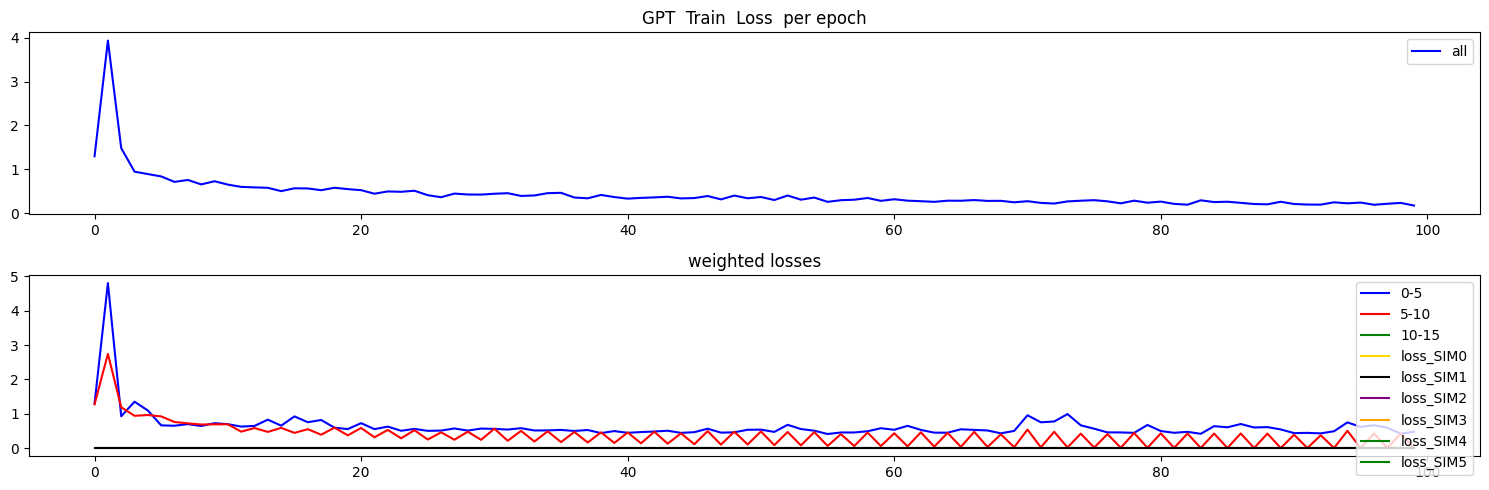

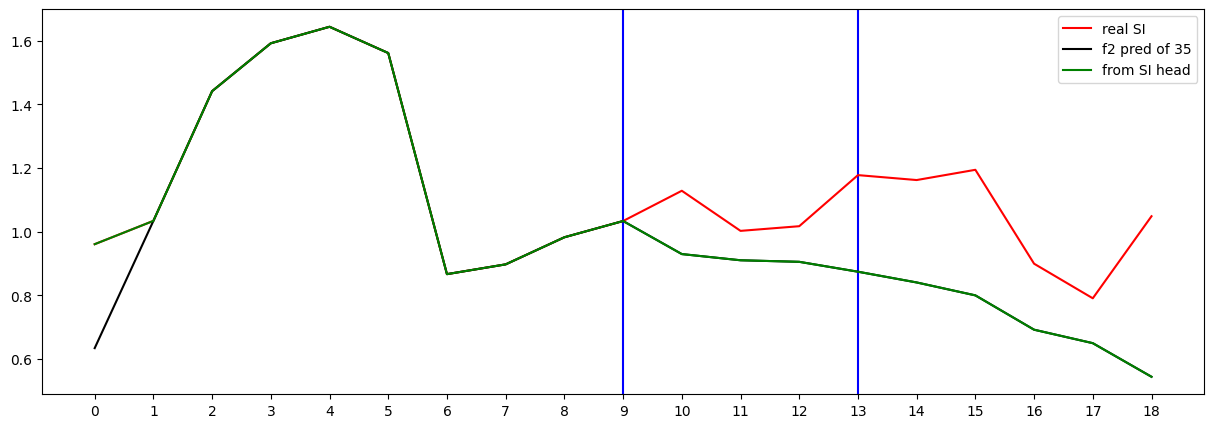

Testing R**2 - (all) - (no inputs):  0.9774997218854352
Testing R**2 - (f2) - SI full (no inputs):  -3.440828999947728
Testing R**2 - SI head only (no inputs):  -3.440828999947728
0 ...index R**2 (no inputs):  0.04767808053642475
1 ...index R**2 (no inputs):  -1.0912721975322879
2 ...index R**2 (no inputs):  -3.440828999947728
3 ...index R**2 (no inputs):  -0.8355621540065443
4 ...index R**2 (no inputs):  -47.3980205079456
5 ...index R**2 (no inputs):  -3.0726260214409944
6 ...index R**2 (no inputs):  -143.09970902785759
7 ...index R**2 (no inputs):  -8405.070629393103
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.16770251222019228
10 ...index R**2 (no inputs):  -1.317071837141758
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.789606668541047
16 ...index R**2 (no inputs):  0.1282749787081945
17 ...index R**2 (no inputs):  -178.8398152669270

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.056897
Loss_SI: 1.1875766515731812 Loss_all: 1.1350440979003906
===


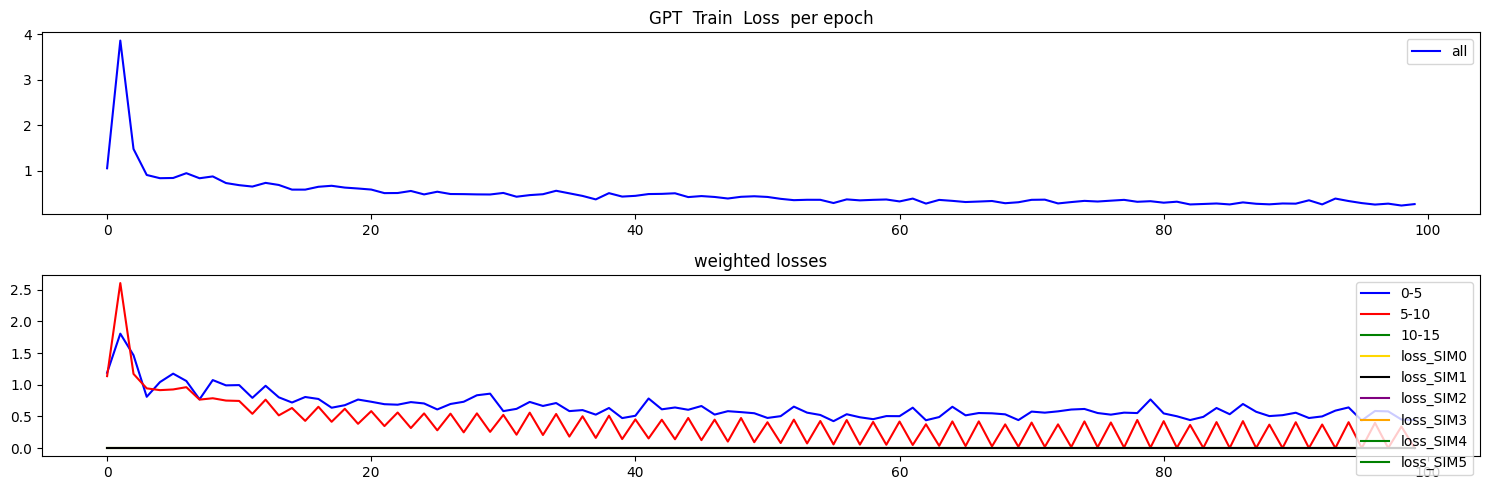

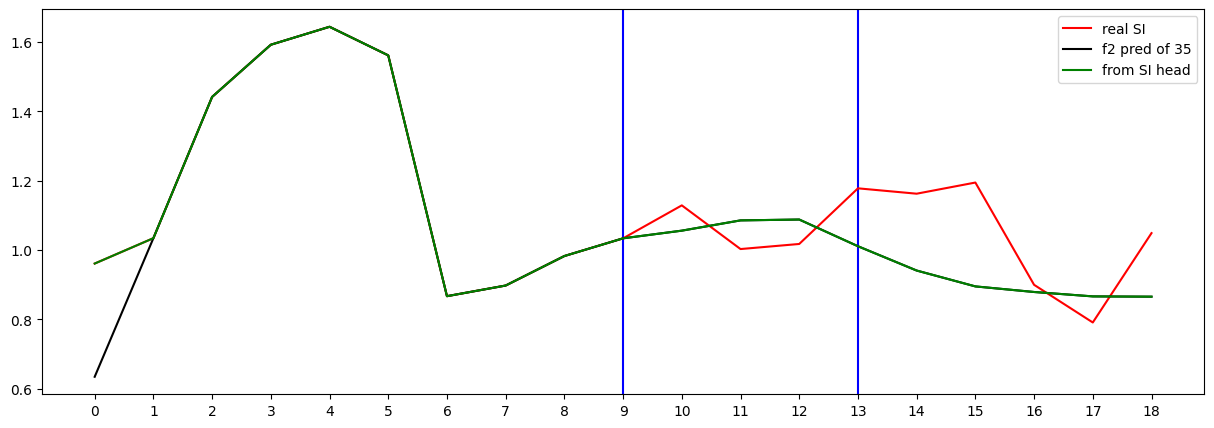

Testing R**2 - (all) - (no inputs):  0.9703799692217381
Testing R**2 - (f2) - SI full (no inputs):  -0.04425581233012332
Testing R**2 - SI head only (no inputs):  -0.04425581233012332
0 ...index R**2 (no inputs):  0.13434383023303986
1 ...index R**2 (no inputs):  0.026336783202914105
2 ...index R**2 (no inputs):  -0.04425581233012332
3 ...index R**2 (no inputs):  -0.0817632646910107
4 ...index R**2 (no inputs):  -3.7273860625362127
5 ...index R**2 (no inputs):  -4.3566747692843
6 ...index R**2 (no inputs):  -136.54188049066386
7 ...index R**2 (no inputs):  -1184.3611813378072
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.02468683451725351
10 ...index R**2 (no inputs):  -1.1217540700273876
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -6.465039403653266
16 ...index R**2 (no inputs):  -0.14598371570934865
17 ...index R**2 (no inputs):  -1615.79

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.344270
Loss_SI: 1.3802921772003174 Loss_all: 1.2569772005081177
===


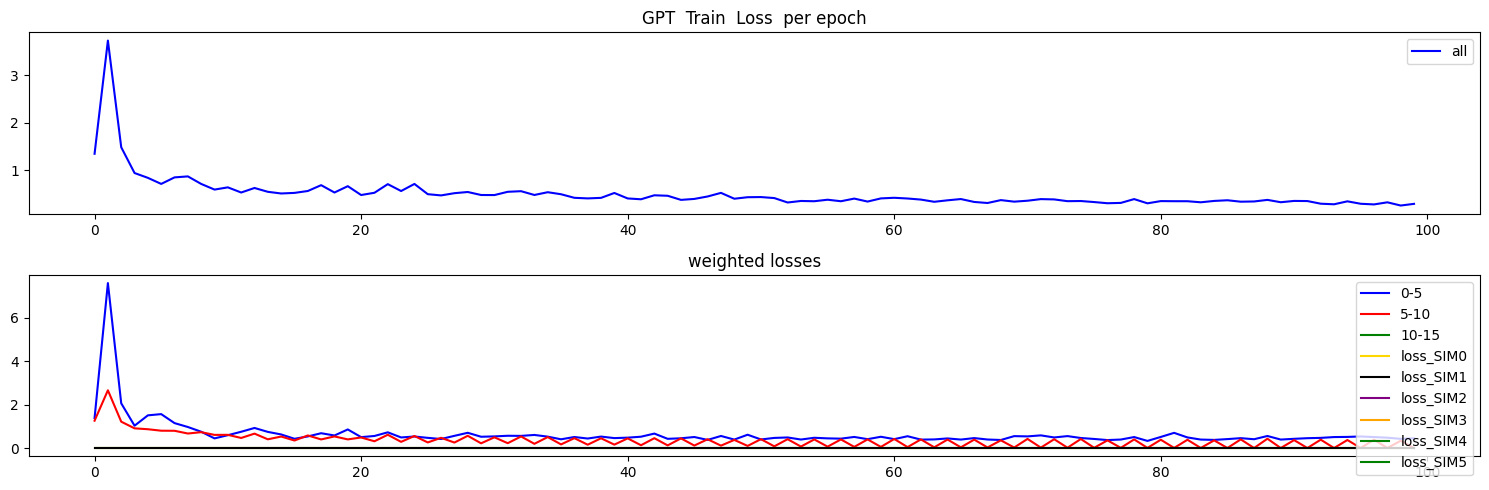

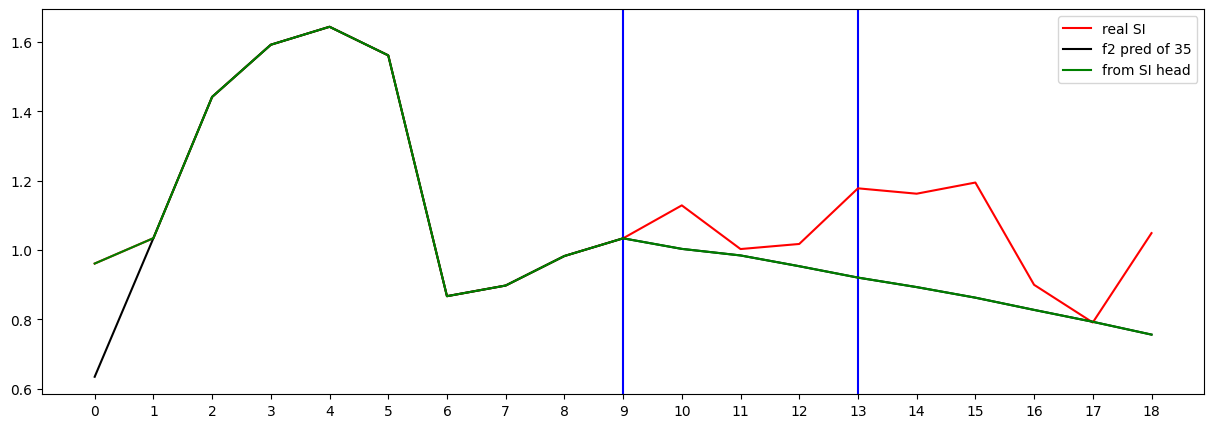

Testing R**2 - (all) - (no inputs):  0.9843538358283815
Testing R**2 - (f2) - SI full (no inputs):  -1.1220881803766507
Testing R**2 - SI head only (no inputs):  -1.1220881803766507
0 ...index R**2 (no inputs):  0.058941279916503775
1 ...index R**2 (no inputs):  -0.19443101698629905
2 ...index R**2 (no inputs):  -1.1220881803766507
3 ...index R**2 (no inputs):  -0.00742901072540203
4 ...index R**2 (no inputs):  -175.64742313723556
5 ...index R**2 (no inputs):  -1.8066645935889873
6 ...index R**2 (no inputs):  -659.7765803107138
7 ...index R**2 (no inputs):  -12750.005037880532
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.06508850288488999
10 ...index R**2 (no inputs):  -0.5605235204410883
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.23561363766161203
16 ...index R**2 (no inputs):  0.0783842596227724
17 ...index R**2 (no inputs):  -621.30

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.281060
Loss_SI: 1.3379850387573242 Loss_all: 1.253581166267395
===


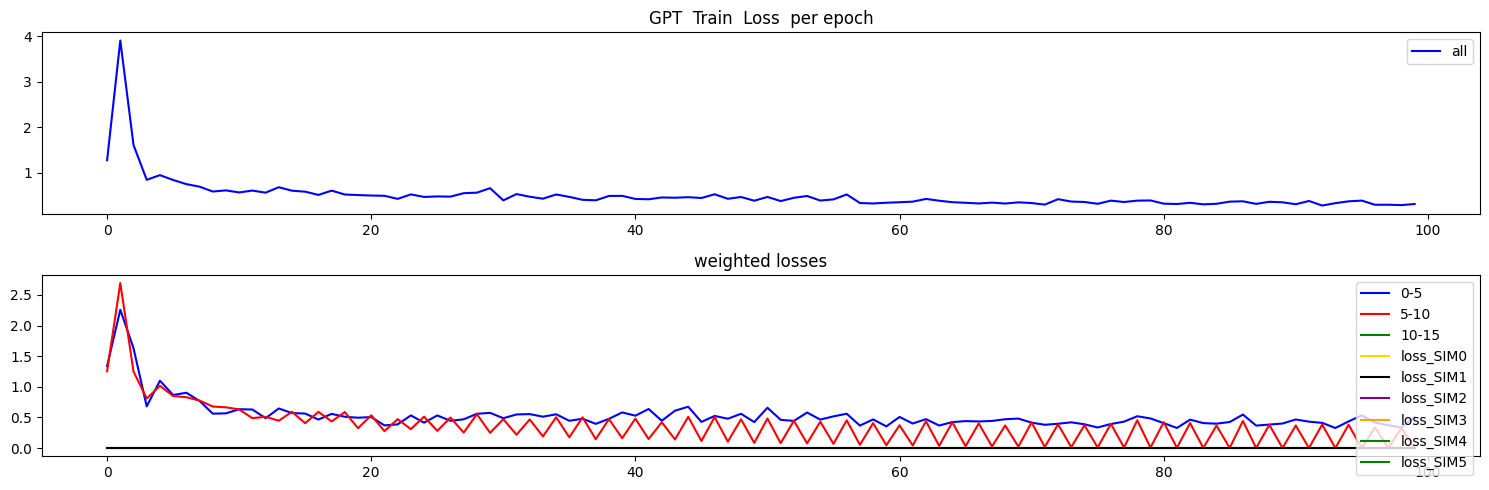

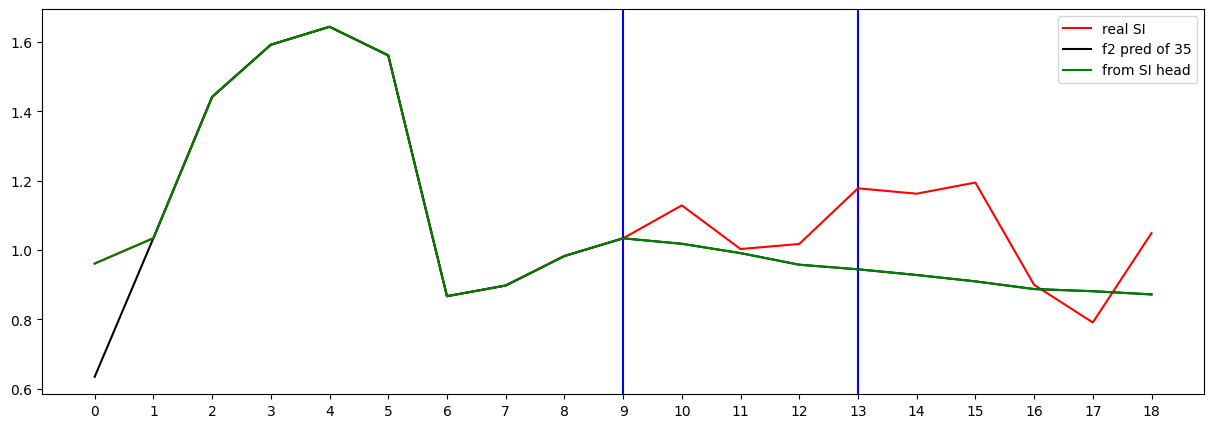

Testing R**2 - (all) - (no inputs):  0.931297079471115
Testing R**2 - (f2) - SI full (no inputs):  -0.4561783118829703
Testing R**2 - SI head only (no inputs):  -0.4561783118829703
0 ...index R**2 (no inputs):  -0.06764622551370536
1 ...index R**2 (no inputs):  -0.12604868137378378
2 ...index R**2 (no inputs):  -0.4561783118829703
3 ...index R**2 (no inputs):  -1.7874177138032086
4 ...index R**2 (no inputs):  -1171.5388685558946
5 ...index R**2 (no inputs):  -11.400132581227135
6 ...index R**2 (no inputs):  -198.64633336070423
7 ...index R**2 (no inputs):  -30738.43178258296
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.0536392205399675
10 ...index R**2 (no inputs):  -0.16533916177863328
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.0553591037335035
16 ...index R**2 (no inputs):  -0.32328722420187583
17 ...index R**2 (no inputs):  -13017.20

In [49]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 6


In [50]:


chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()



[0] Train Loss: 1.199222
Loss_SI: 1.2122143507003784 Loss_all: 1.0890027284622192
===


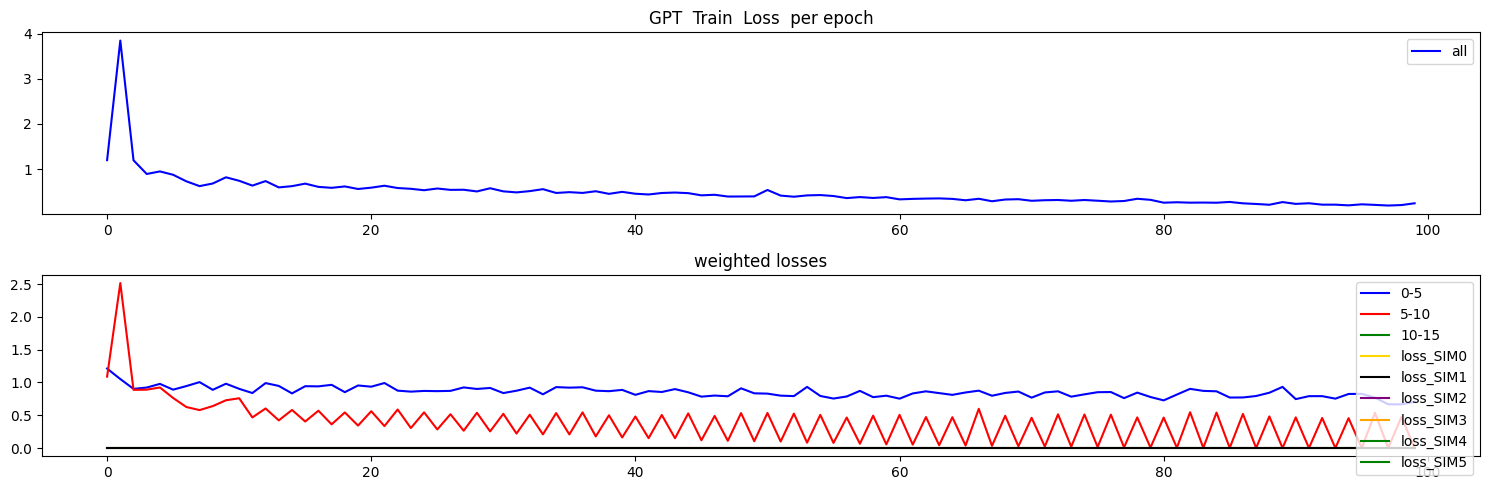

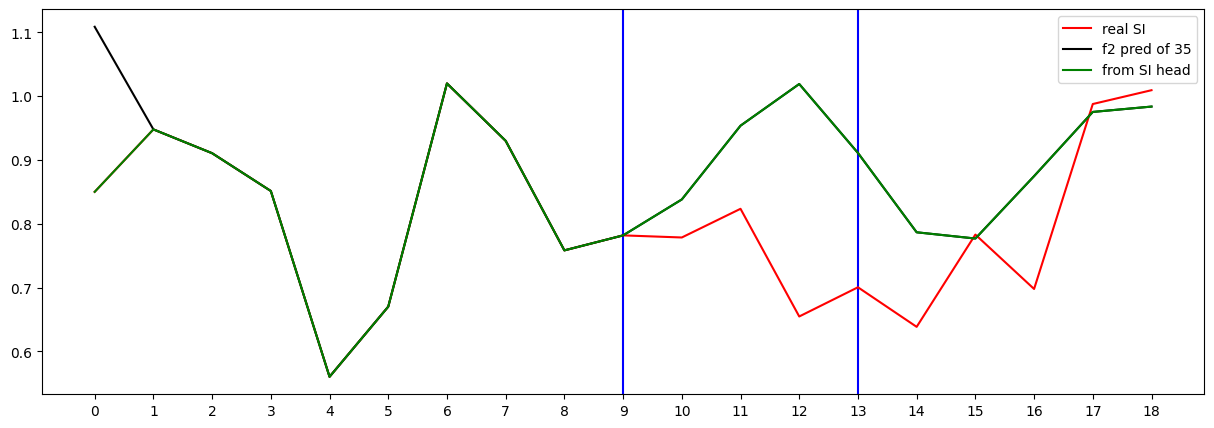

Testing R**2 - (all) - (no inputs):  0.9803101421327175
Testing R**2 - (f2) - SI full (no inputs):  -1.028447475678258
Testing R**2 - SI head only (no inputs):  -1.028447475678258
0 ...index R**2 (no inputs):  -0.9034938287366594
1 ...index R**2 (no inputs):  -1.8890951088853347
2 ...index R**2 (no inputs):  -1.028447475678258
3 ...index R**2 (no inputs):  -875.5100811751627
4 ...index R**2 (no inputs):  -6.185891894595739
5 ...index R**2 (no inputs):  -1.6591599320176438
6 ...index R**2 (no inputs):  -61.327527784496986
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.984267756759949
10 ...index R**2 (no inputs):  -3.004509001099983
11 ...index R**2 (no inputs):  -71.8117165380629
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.206830892397999
16 ...index R**2 (no inputs):  -0.3671125125205852
17 ...index R**2 (no inputs):  -237.3626814421338
1

In [51]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )



[0] Train Loss: 1.218968
Loss_SI: 1.428778052330017 Loss_all: 1.2269749641418457
===


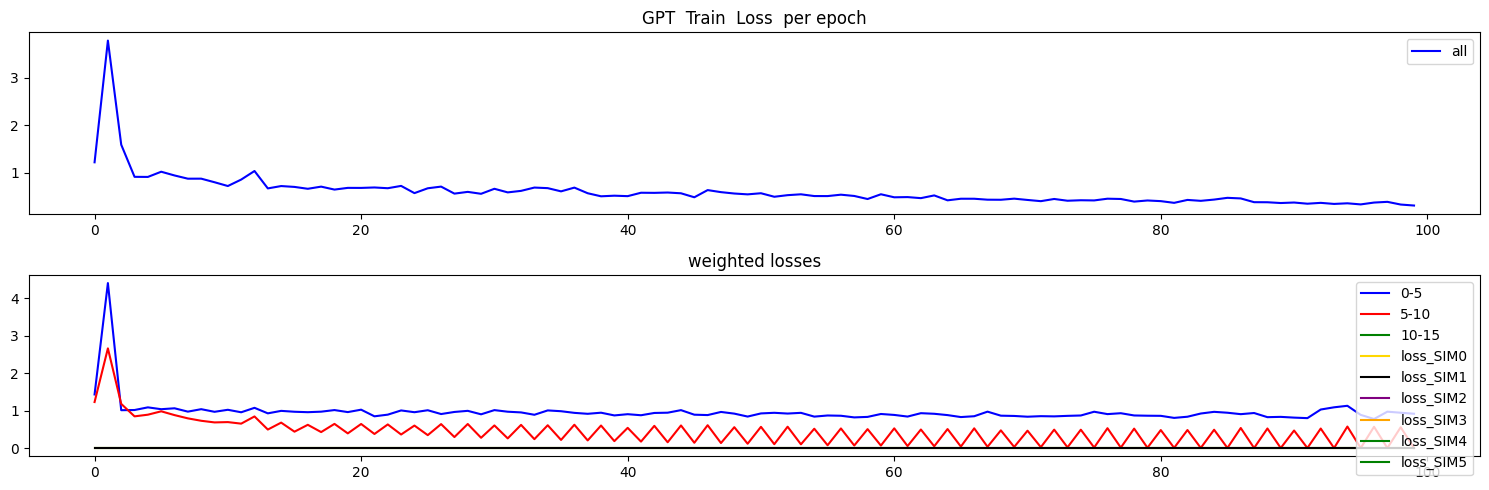

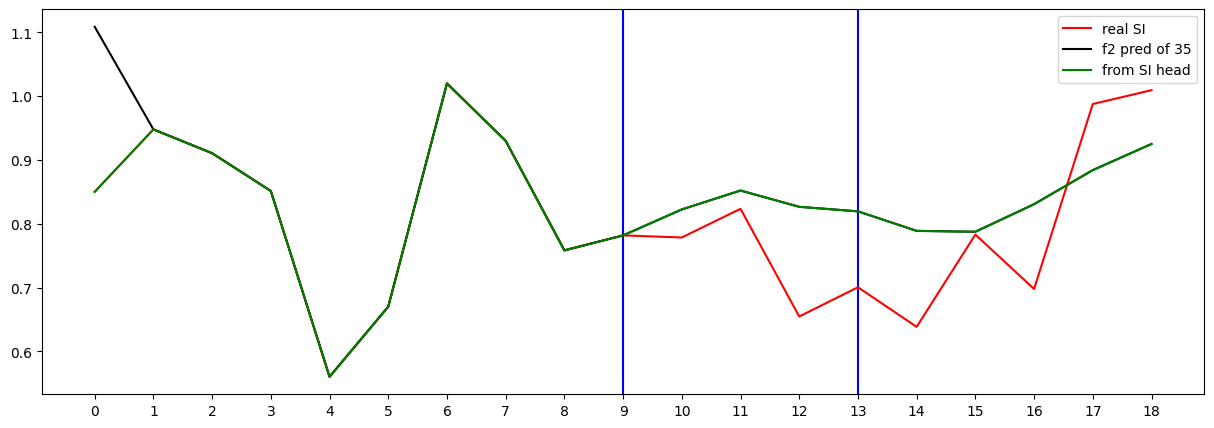

Testing R**2 - (all) - (no inputs):  0.9751062170984406
Testing R**2 - (f2) - SI full (no inputs):  0.053023581891031624
Testing R**2 - SI head only (no inputs):  0.053023581891031624
0 ...index R**2 (no inputs):  0.008381245368502266
1 ...index R**2 (no inputs):  0.04072499130309548
2 ...index R**2 (no inputs):  0.053023581891031624
3 ...index R**2 (no inputs):  -2382.5135109806024
4 ...index R**2 (no inputs):  0.11140858110475083
5 ...index R**2 (no inputs):  -2.361417223030764
6 ...index R**2 (no inputs):  -1.9444305206608998
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.7158976778847332
10 ...index R**2 (no inputs):  -0.16203455957021684
11 ...index R**2 (no inputs):  -57.57793878124808
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.173931212322594
16 ...index R**2 (no inputs):  -0.4200550532183065
17 ...index R**2 (no inputs):  -1385.58

In [52]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.137948
Loss_SI: 1.1069300174713135 Loss_all: 1.1352319717407227
===


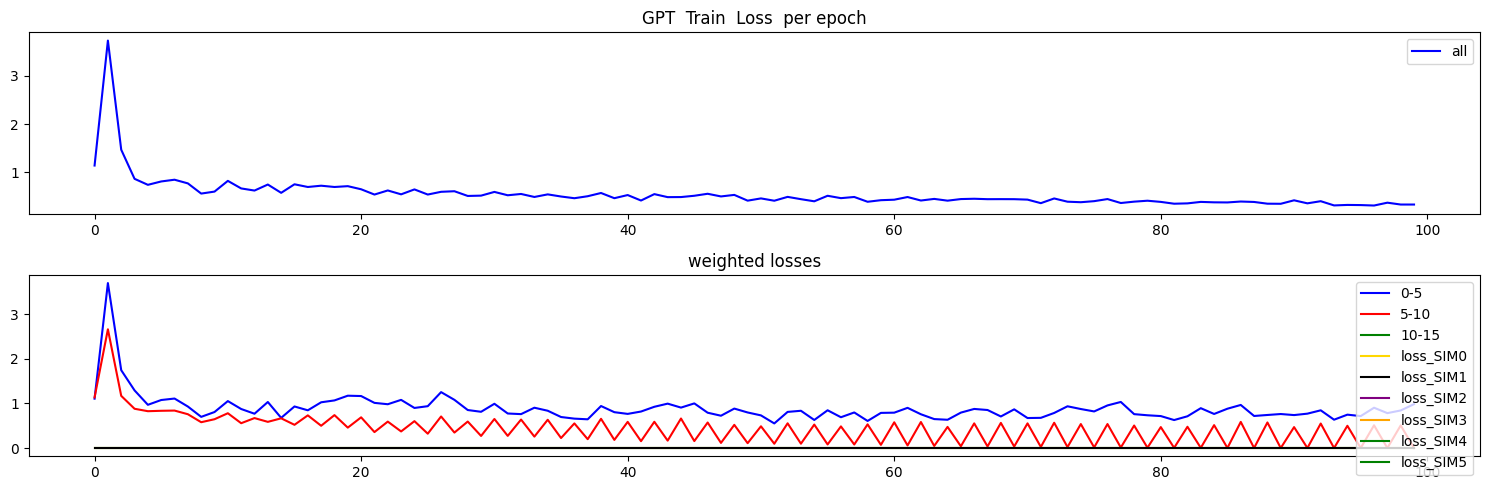

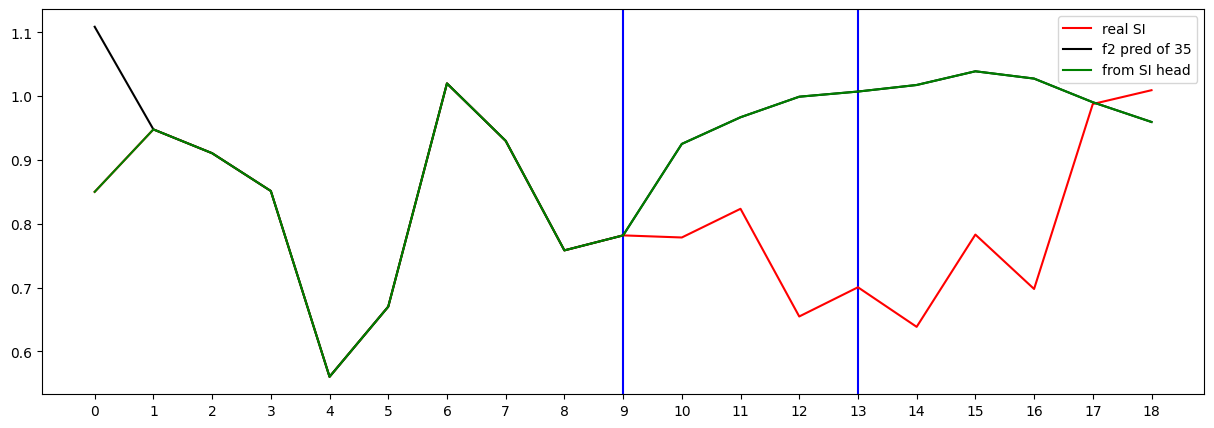

Testing R**2 - (all) - (no inputs):  0.9680153125003652
Testing R**2 - (f2) - SI full (no inputs):  -2.4644008958853996
Testing R**2 - SI head only (no inputs):  -2.4644008958853996
0 ...index R**2 (no inputs):  -0.23074857388681713
1 ...index R**2 (no inputs):  -1.4744074040398298
2 ...index R**2 (no inputs):  -2.4644008958853996
3 ...index R**2 (no inputs):  -10822.335680020791
4 ...index R**2 (no inputs):  -6.580684322298221
5 ...index R**2 (no inputs):  -3.3313081630662147
6 ...index R**2 (no inputs):  -1.7397500330854987
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.604046283463819
10 ...index R**2 (no inputs):  -0.6484039523084806
11 ...index R**2 (no inputs):  -148.8400864438414
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -14.447241624154296
16 ...index R**2 (no inputs):  -0.27569666310181296
17 ...index R**2 (no inputs):  -725.014439

In [53]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )



[0] Train Loss: 1.361536
Loss_SI: 1.3052074909210205 Loss_all: 1.2312902212142944
===


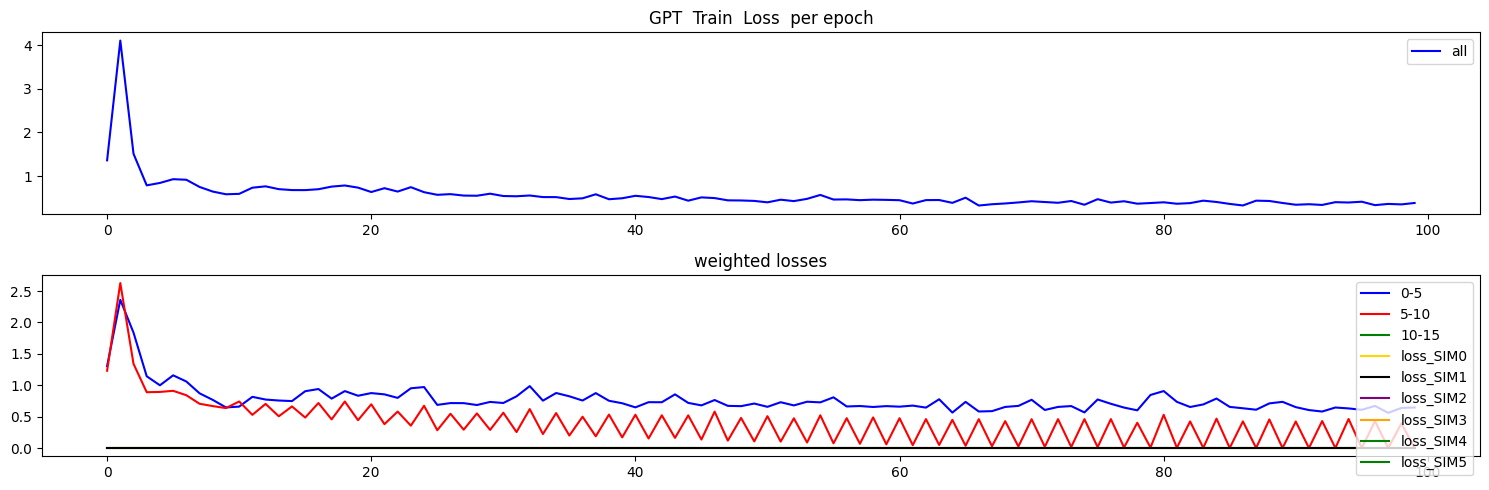

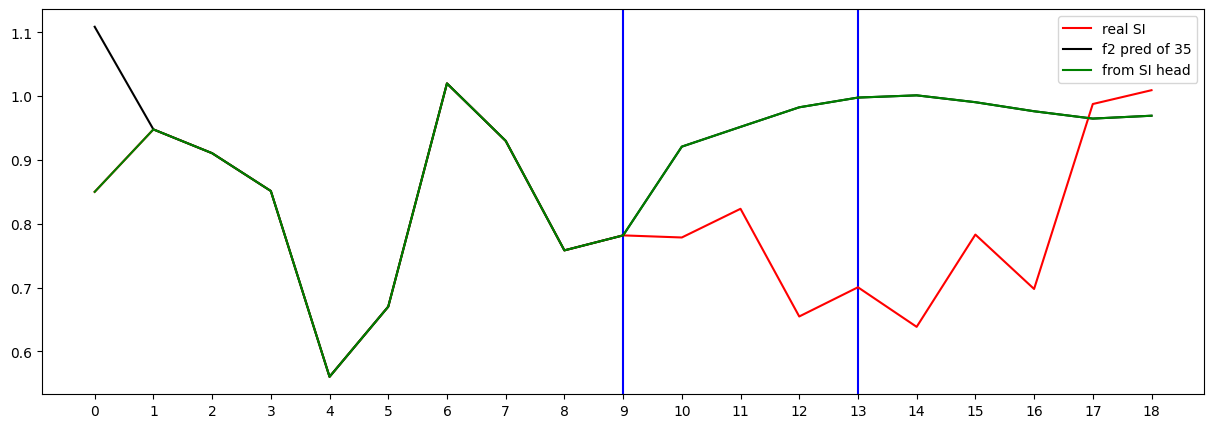

Testing R**2 - (all) - (no inputs):  0.9809616594268699
Testing R**2 - (f2) - SI full (no inputs):  -2.048591933528285
Testing R**2 - SI head only (no inputs):  -2.048591933528285
0 ...index R**2 (no inputs):  -0.09366562259099331
1 ...index R**2 (no inputs):  -0.7099279306403852
2 ...index R**2 (no inputs):  -2.048591933528285
3 ...index R**2 (no inputs):  -4631.377218241808
4 ...index R**2 (no inputs):  0.37631897617617593
5 ...index R**2 (no inputs):  -1.5483014288573145
6 ...index R**2 (no inputs):  -2.864427969331907
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.10055469822073682
10 ...index R**2 (no inputs):  -0.2835333994159732
11 ...index R**2 (no inputs):  -462.3937331084954
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -20.721266022691665
16 ...index R**2 (no inputs):  -0.3887638842030552
17 ...index R**2 (no inputs):  -2544.65624331

In [54]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [55]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [56]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.33910483786533674


In [57]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: 0.17878630637180537


In [58]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -0.24553052334975156


In [59]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.08144379725084017



## First Few R2


In [60]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def time_series_metrics(y_true, y_pred):
    """
    y_true: numpy array of shape (N,)
    y_pred: numpy array of shape (N,)
    """
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    # Ensure proper alignment
    assert y_true.shape == y_pred.shape, "Mismatched shapes"

    # Naive forecast (lag-1)
    y_naive = np.roll(y_true, 1)
    y_naive[0] = y_true[0]

    # Errors
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    # Naive R²
    ss_res = np.sum((y_true - y_pred)**2)
    ss_naive = np.sum((y_true - y_naive)**2)
    naive_r2 = 1 - ss_res / ss_naive

    # MASE (mean absolute scaled error)
    mae_naive = np.mean(np.abs(y_true[1:] - y_true[:-1])) + 1e-8  # avoid div-by-zero
    mase = np.mean(np.abs(y_true - y_pred)) / mae_naive

    metrics = {
        "RMSE": rmse,
        "MAE": mae,
        "Naive_R2": naive_r2,
        "MASE": mase
    }

    print(f"Naive_R2:....................................R²: {naive_r2:.4f}")
    print(f"RMSE:{rmse:.4f},MAE:{mae:.4f},MASE:{mase:.4f}")
    
    ## for k, v in metrics.items():
    ##     print(f"{k}: {v:.4f}")
    




In [61]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    start =  THE_FIRST_FEW - 1
    for i in range( start, len(real), 9 ):
        real_first4.append(real[i])
        pred_first4.append(pred[i])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".......................R² on just step n - R²:", r2_first4)
    
    time_series_metrics(real_first4, pred_first4)


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....................R² on first n steps - R²:", r2_first4)
    
    
    time_series_metrics(real_first4, pred_first4)
    
    print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW )
    
    print('===================================================================')
    

    


In [62]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....................R² on first n steps - R²: 0.8203485763078591
Naive_R2:....................................R²: 0.9507
RMSE:0.0582,MAE:0.0539,MASE:0.2055
1 .......................R² on just step n - R²: 0.8203485763078591
Naive_R2:....................................R²: 0.9507
RMSE:0.0582,MAE:0.0539,MASE:0.2055
2 .....................R² on first n steps - R²: 0.19723315704848554
Naive_R2:....................................R²: 0.5383
RMSE:0.1397,MAE:0.1149,MASE:0.6701
2 .......................R² on just step n - R²: -0.32918614090531917
Naive_R2:....................................R²: 0.3441
RMSE:0.1889,MAE:0.1759,MASE:0.7740
3 .....................R² on first n steps - R²: -0.25705404717503555
Naive_R2:....................................R²: 0.2282
RMSE:0.1812,MAE:0.1535,MASE:0.8694
3 .......................R² on just step n - R²: -1.0031583806780993
Naive_R2:....................................R²: 0.0423
RMSE:0.2437,MAE:0.2307,MASE:0.9491
4 .....................R² on first n ste

In [63]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....................R² on first n steps - R²: 0.059594502317189546
Naive_R2:....................................R²: 0.7417
RMSE:0.1332,MAE:0.0793,MASE:0.3020
1 .......................R² on just step n - R²: 0.059594502317189546
Naive_R2:....................................R²: 0.7417
RMSE:0.1332,MAE:0.0793,MASE:0.3020
2 .....................R² on first n steps - R²: 0.08233099963710544
Naive_R2:....................................R²: 0.4722
RMSE:0.1494,MAE:0.1167,MASE:0.6804
2 .......................R² on just step n - R²: -0.0029159677520986804
Naive_R2:....................................R²: 0.5051
RMSE:0.1640,MAE:0.1541,MASE:0.6781
3 .....................R² on first n steps - R²: 0.25692706673348764
Naive_R2:....................................R²: 0.5438
RMSE:0.1393,MAE:0.1148,MASE:0.6503
3 .......................R² on just step n - R²: 0.5429210630986413
Naive_R2:....................................R²: 0.7815
RMSE:0.1164,MAE:0.1111,MASE:0.4570
4 .....................R² on first n

In [64]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....................R² on first n steps - R²: 0.3397793949998056
Naive_R2:....................................R²: 0.8186
RMSE:0.1116,MAE:0.0923,MASE:0.3517
1 .......................R² on just step n - R²: 0.3397793949998056
Naive_R2:....................................R²: 0.8186
RMSE:0.1116,MAE:0.0923,MASE:0.3517
2 .....................R² on first n steps - R²: 0.13665646887505978
Naive_R2:....................................R²: 0.5035
RMSE:0.1449,MAE:0.1132,MASE:0.6598
2 .......................R² on just step n - R²: -0.10131179742799534
Naive_R2:....................................R²: 0.4566
RMSE:0.1719,MAE:0.1340,MASE:0.5896
3 .....................R² on first n steps - R²: -0.11550653625771812
Naive_R2:....................................R²: 0.3151
RMSE:0.1707,MAE:0.1415,MASE:0.8011
3 .......................R² on just step n - R²: -0.5299072160093727
Naive_R2:....................................R²: 0.2685
RMSE:0.2130,MAE:0.1980,MASE:0.8148
4 .....................R² on first n ste

In [65]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....................R² on first n steps - R²: 0.570418516517827
Naive_R2:....................................R²: 0.8820
RMSE:0.0900,MAE:0.0763,MASE:0.2907
1 .......................R² on just step n - R²: 0.570418516517827
Naive_R2:....................................R²: 0.8820
RMSE:0.0900,MAE:0.0763,MASE:0.2907
2 .....................R² on first n steps - R²: 0.17415349078271236
Naive_R2:....................................R²: 0.5250
RMSE:0.1417,MAE:0.1038,MASE:0.6050
2 .......................R² on just step n - R²: -0.19540155290512407
Naive_R2:....................................R²: 0.4101
RMSE:0.1791,MAE:0.1312,MASE:0.5774
3 .....................R² on first n steps - R²: 0.024753384059608252
Naive_R2:....................................R²: 0.4012
RMSE:0.1596,MAE:0.1233,MASE:0.6984
3 .......................R² on just step n - R²: -0.22096219757498092
Naive_R2:....................................R²: 0.4162
RMSE:0.1903,MAE:0.1624,MASE:0.6683
4 .....................R² on first n step


## Plot


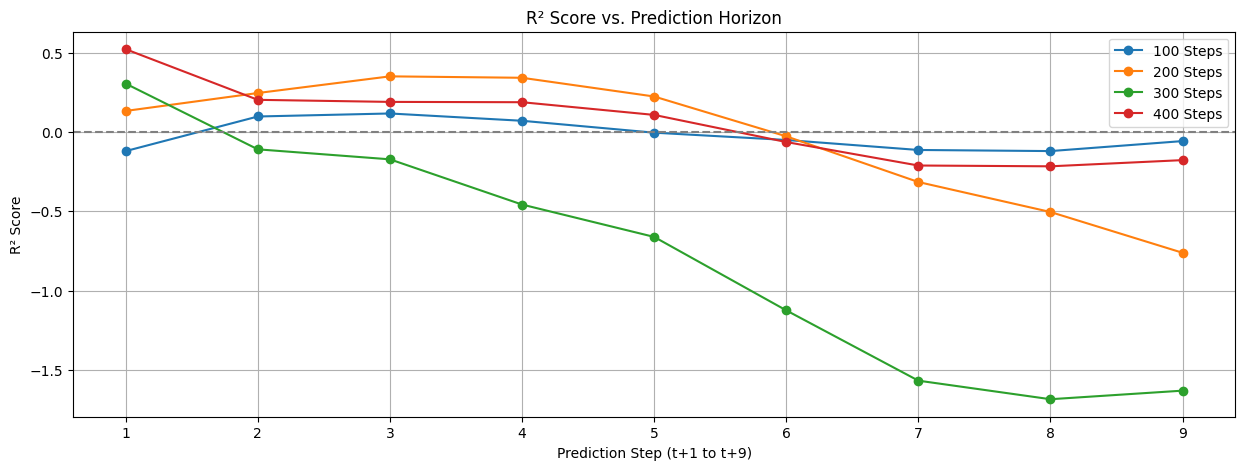

In [66]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
